# Dengue Fever Case Prediction

https://www.drivendata.org/competitions/44/dengai-predicting-disease-spread/

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score, learning_curve

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_absolute_error
from sklearn.feature_selection import RFE

In [13]:
data = pd.read_csv('dengue_features_train.csv')
label = pd.read_csv('dengue_labels_train.csv')
target = pd.read_csv('dengue_features_test.csv')

data

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1451,iq,2010,21,2010-05-28,0.342750,0.318900,0.256343,0.292514,55.30,299.334286,...,45.00,88.765714,55.30,18.485714,9.800000,28.633333,11.933333,35.4,22.4,27.0
1452,iq,2010,22,2010-06-04,0.160157,0.160371,0.136043,0.225657,86.47,298.330000,...,207.10,91.600000,86.47,18.070000,7.471429,27.433333,10.500000,34.7,21.7,36.6
1453,iq,2010,23,2010-06-11,0.247057,0.146057,0.250357,0.233714,58.94,296.598571,...,50.60,94.280000,58.94,17.008571,7.500000,24.400000,6.900000,32.2,19.2,7.4
1454,iq,2010,24,2010-06-18,0.333914,0.245771,0.278886,0.325486,59.67,296.345714,...,62.33,94.660000,59.67,16.815714,7.871429,25.433333,8.733333,31.2,21.0,16.0


In [14]:
label

,city,year,weekofyear,total_cases
0,sj,1990,18,4
1,sj,1990,19,5
2,sj,1990,20,4
3,sj,1990,21,3
4,sj,1990,22,6
...,...,...,...,...
1451,iq,2010,21,5
1452,iq,2010,22,8
1453,iq,2010,23,1
1454,iq,2010,24,1


In [15]:
target

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,2008,18,2008-04-29,-0.018900,-0.018900,0.102729,0.091200,78.60,298.492857,...,25.37,78.781429,78.60,15.918571,3.128571,26.528571,7.057143,33.3,21.7,75.2
1,sj,2008,19,2008-05-06,-0.018000,-0.012400,0.082043,0.072314,12.56,298.475714,...,21.83,78.230000,12.56,15.791429,2.571429,26.071429,5.557143,30.0,22.2,34.3
2,sj,2008,20,2008-05-13,-0.001500,NaN,0.151083,0.091529,3.66,299.455714,...,4.12,78.270000,3.66,16.674286,4.428571,27.928571,7.785714,32.8,22.8,3.0
3,sj,2008,21,2008-05-20,NaN,-0.019867,0.124329,0.125686,0.00,299.690000,...,2.20,73.015714,0.00,15.775714,4.342857,28.057143,6.271429,33.3,24.4,0.3
4,sj,2008,22,2008-05-27,0.056800,0.039833,0.062267,0.075914,0.76,299.780000,...,4.36,74.084286,0.76,16.137143,3.542857,27.614286,7.085714,33.3,23.3,84.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
411,iq,2013,22,2013-05-28,0.301471,0.380029,0.280629,0.383186,41.12,297.774286,...,67.60,89.990000,41.12,17.185714,10.100000,27.400000,9.050000,32.6,21.8,33.0
412,iq,2013,23,2013-06-04,0.247600,0.296343,0.285371,0.350357,71.52,297.167143,...,45.70,93.891429,71.52,17.448571,9.657143,27.520000,10.720000,33.8,21.4,68.0
413,iq,2013,24,2013-06-11,0.238729,0.251029,0.252586,0.249771,78.96,295.831429,...,45.22,94.967143,78.96,16.410000,7.385714,27.200000,10.075000,32.6,21.6,93.2
414,iq,2013,25,2013-06-18,0.310429,0.302700,0.406614,0.403943,39.54,295.778571,...,4.70,89.057143,39.54,15.137143,8.228571,26.700000,8.480000,32.2,21.8,34.1


In [16]:
# Pack the data for easy re-reading later and plan the data format
df_subset = target.iloc[:, :3]
df_subset.to_csv('Submission.csv', index=False)
df_subset.head()

,city,year,weekofyear
0,sj,2008,18
1,sj,2008,19
2,sj,2008,20
3,sj,2008,21
4,sj,2008,22


In [17]:
# Show all columns
pd.set_option('display.max_columns', None)

In [18]:
# Merge data and label
df = pd.merge(data, label, on=['city', 'year', 'weekofyear'])
df

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,297.742857,292.414286,299.8,295.9,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,298.442857,293.951429,300.9,296.4,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,298.878571,295.434286,300.5,297.3,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,299.228571,295.310000,301.4,297.0,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,299.664286,295.821429,301.9,297.5,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1451,iq,2010,21,2010-05-28,0.342750,0.318900,0.256343,0.292514,55.30,299.334286,300.771429,296.825714,309.7,294.5,45.00,88.765714,55.30,18.485714,9.800000,28.633333,11.933333,35.4,22.4,27.0,5
1452,iq,2010,22,2010-06-04,0.160157,0.160371,0.136043,0.225657,86.47,298.330000,299.392857,296.452857,308.5,291.9,207.10,91.600000,86.47,18.070000,7.471429,27.433333,10.500000,34.7,21.7,36.6,8
1453,iq,2010,23,2010-06-11,0.247057,0.146057,0.250357,0.233714,58.94,296.598571,297.592857,295.501429,305.5,292.4,50.60,94.280000,58.94,17.008571,7.500000,24.400000,6.900000,32.2,19.2,7.4,1
1454,iq,2010,24,2010-06-18,0.333914,0.245771,0.278886,0.325486,59.67,296.345714,297.521429,295.324286,306.1,291.9,62.33,94.660000,59.67,16.815714,7.871429,25.433333,8.733333,31.2,21.0,16.0,1


## EDA

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1456 entries, 0 to 1455
Data columns (total 25 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   city                                   1456 non-null   object 
 1   year                                   1456 non-null   int64  
 2   weekofyear                             1456 non-null   int64  
 3   week_start_date                        1456 non-null   object 
 4   ndvi_ne                                1262 non-null   float64
 5   ndvi_nw                                1404 non-null   float64
 6   ndvi_se                                1434 non-null   float64
 7   ndvi_sw                                1434 non-null   float64
 8   precipitation_amt_mm                   1443 non-null   float64
 9   reanalysis_air_temp_k                  1446 non-null   float64
 10  reanalysis_avg_temp_k                  1446 non-null   float64
 11  rean

In [20]:
df.describe()

,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
count,1456.000000,1456.000000,1262.000000,1404.000000,1434.000000,1434.000000,1443.000000,1446.000000,1446.000000,1446.000000,1446.000000,1446.000000,1446.000000,1446.000000,1443.000000,1446.000000,1446.000000,1413.000000,1413.000000,1436.000000,1442.000000,1434.000000,1456.000000
mean,2001.031593,26.503434,0.142294,0.130553,0.203783,0.202305,45.760388,298.701852,299.225578,295.246356,303.427109,295.719156,40.151819,82.161959,45.760388,16.746427,4.903754,27.185783,8.059328,32.452437,22.102150,39.326360,24.675137
std,5.408314,15.019437,0.140531,0.119999,0.073860,0.083903,43.715537,1.362420,1.261715,1.527810,3.234601,2.565364,43.434399,7.153897,43.715537,1.542494,3.546445,1.292347,2.128568,1.959318,1.574066,47.455314,43.596000
min,1990.000000,1.000000,-0.406250,-0.456100,-0.015533,-0.063457,0.000000,294.635714,294.892857,289.642857,297.800000,286.900000,0.000000,57.787143,0.000000,11.715714,1.357143,21.400000,4.528571,26.700000,14.700000,0.000000,0.000000
25%,1997.000000,13.750000,0.044950,0.049217,0.155087,0.144209,9.800000,297.658929,298.257143,294.118929,301.000000,293.900000,13.055000,77.177143,9.800000,15.557143,2.328571,26.300000,6.514286,31.100000,21.100000,8.700000,5.000000
50%,2002.000000,26.500000,0.128817,0.121429,0.196050,0.189450,38.340000,298.646429,299.289286,295.640714,302.400000,296.200000,27.245000,80.301429,38.340000,17.087143,2.857143,27.414286,7.300000,32.800000,22.200000,23.850000,12.000000
75%,2005.000000,39.250000,0.248483,0.216600,0.248846,0.246982,70.235000,299.833571,300.207143,296.460000,305.500000,297.900000,52.200000,86.357857,70.235000,17.978214,7.625000,28.157143,9.566667,33.900000,23.300000,53.900000,28.000000
max,2010.000000,53.000000,0.508357,0.454429,0.538314,0.546017,390.600000,302.200000,302.928571,298.450000,314.000000,299.900000,570.500000,98.610000,390.600000,20.461429,16.028571,30.800000,15.800000,42.200000,25.600000,543.300000,461.000000


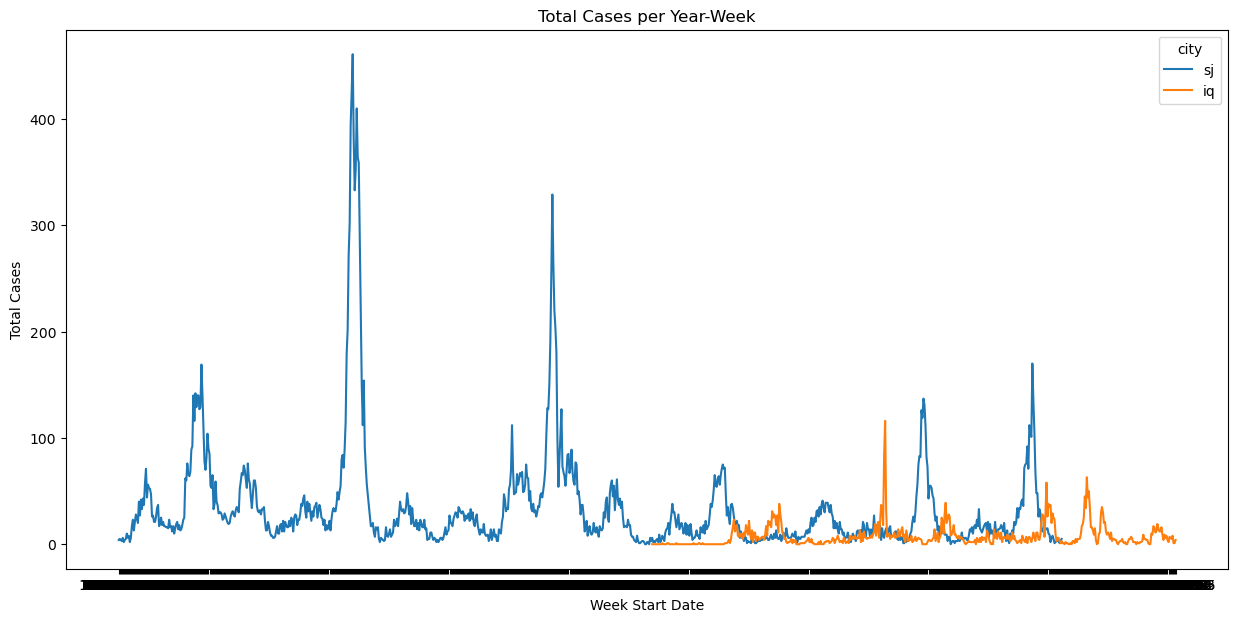

In [21]:
# Total cases against week start date
plt.figure(figsize=(15, 7))
sns.lineplot(data=df, x='week_start_date', y='total_cases', hue='city', sizes=(20, 200))
plt.xlabel('Week Start Date')
plt.ylabel('Total Cases')
plt.title('Total Cases per Year-Week')
plt.show()

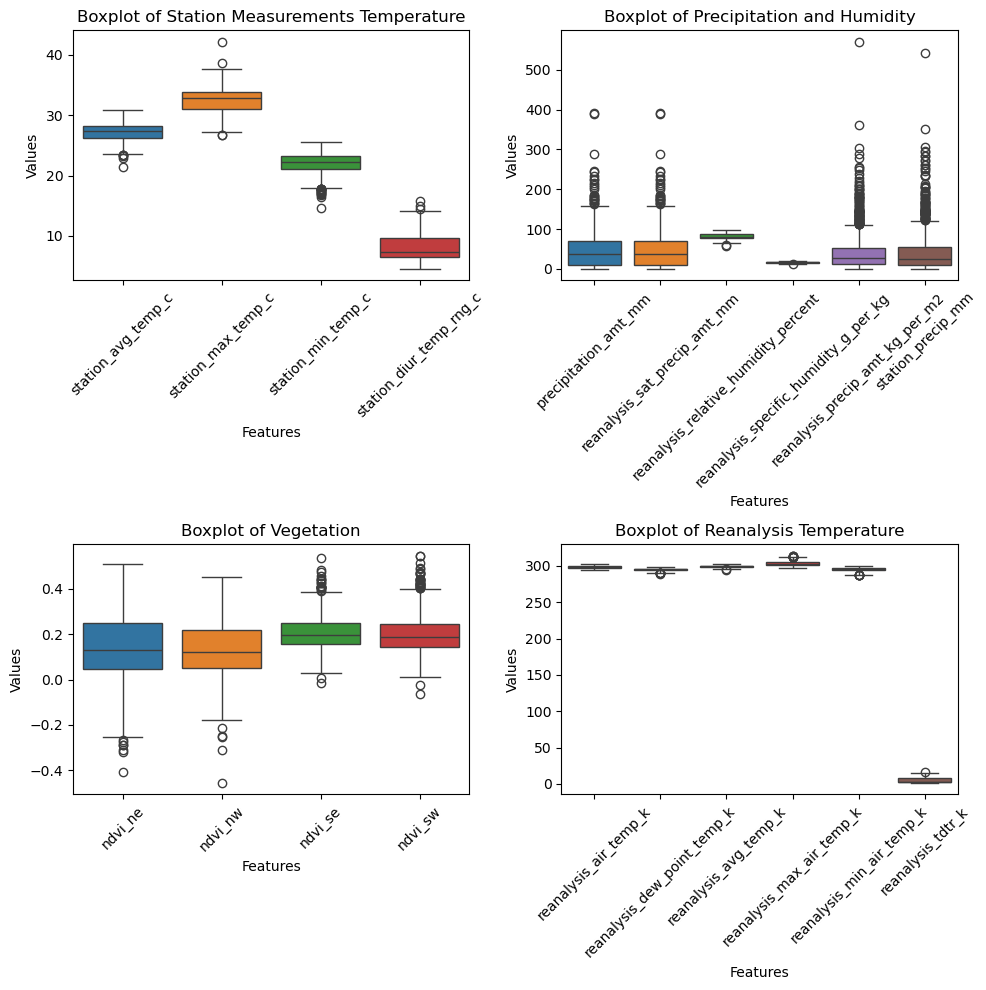

In [22]:
# Plot boxplot for all numerical features

num_features_1 = ['station_avg_temp_c', 'station_max_temp_c', 'station_min_temp_c', 'station_diur_temp_rng_c']

num_features_2 = ['precipitation_amt_mm', 'reanalysis_sat_precip_amt_mm', 'reanalysis_relative_humidity_percent', 
                  'reanalysis_specific_humidity_g_per_kg', 'reanalysis_precip_amt_kg_per_m2', 'station_precip_mm']

num_features_3 = ['ndvi_ne', 'ndvi_nw', 'ndvi_se', 'ndvi_sw']

num_features_4 = ['reanalysis_air_temp_k', 'reanalysis_dew_point_temp_k', 'reanalysis_avg_temp_k', 
                  'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k', 'reanalysis_tdtr_k']

plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)
sns.boxplot(data=df[num_features_1])
plt.title('Boxplot of Station Measurements Temperature')
plt.xlabel('Features')
plt.ylabel('Values')
plt.xticks(rotation=45)  

plt.subplot(2, 2, 2)
sns.boxplot(data=df[num_features_2])
plt.title('Boxplot of Precipitation and Humidity')
plt.xlabel('Features')
plt.ylabel('Values')
plt.xticks(rotation=45)  

plt.subplot(2, 2, 3)
sns.boxplot(data=df[num_features_3])
plt.title('Boxplot of Vegetation')
plt.xlabel('Features')
plt.ylabel('Values')
plt.xticks(rotation=45)  

plt.subplot(2, 2, 4)
sns.boxplot(data=df[num_features_4])
plt.title('Boxplot of Reanalysis Temperature')
plt.xlabel('Features')
plt.ylabel('Values')
plt.xticks(rotation=45)  

plt.tight_layout()
plt.show()

In [23]:
# Check missing values
df.isnull().sum()

city                                       0
year                                       0
weekofyear                                 0
week_start_date                            0
ndvi_ne                                  194
ndvi_nw                                   52
ndvi_se                                   22
ndvi_sw                                   22
precipitation_amt_mm                      13
reanalysis_air_temp_k                     10
reanalysis_avg_temp_k                     10
reanalysis_dew_point_temp_k               10
reanalysis_max_air_temp_k                 10
reanalysis_min_air_temp_k                 10
reanalysis_precip_amt_kg_per_m2           10
reanalysis_relative_humidity_percent      10
reanalysis_sat_precip_amt_mm              13
reanalysis_specific_humidity_g_per_kg     10
reanalysis_tdtr_k                         10
station_avg_temp_c                        43
station_diur_temp_rng_c                   43
station_max_temp_c                        20
station_mi

In [24]:
target.isnull().sum()

city                                      0
year                                      0
weekofyear                                0
week_start_date                           0
ndvi_ne                                  43
ndvi_nw                                  11
ndvi_se                                   1
ndvi_sw                                   1
precipitation_amt_mm                      2
reanalysis_air_temp_k                     2
reanalysis_avg_temp_k                     2
reanalysis_dew_point_temp_k               2
reanalysis_max_air_temp_k                 2
reanalysis_min_air_temp_k                 2
reanalysis_precip_amt_kg_per_m2           2
reanalysis_relative_humidity_percent      2
reanalysis_sat_precip_amt_mm              2
reanalysis_specific_humidity_g_per_kg     2
reanalysis_tdtr_k                         2
station_avg_temp_c                       12
station_diur_temp_rng_c                  12
station_max_temp_c                        3
station_min_temp_c              

In [25]:
# Correlation coefficients between all numerical features
corr = df.corr(numeric_only = True)
corr

,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
year,1.000000,-0.071649,0.223361,0.144345,0.234234,0.277759,0.205302,-0.140016,0.085043,0.132273,0.480402,-0.392351,0.132625,0.336349,0.205302,0.161596,0.490542,0.047010,0.373644,0.227320,-0.214482,0.219910,-0.306806
weekofyear,-0.071649,1.000000,0.053548,0.048759,0.121557,0.068701,0.118037,0.425753,0.463677,0.348946,0.238078,0.179679,0.072955,-0.015191,0.118037,0.350821,0.077933,0.368408,0.023220,0.232098,0.292362,0.066294,0.216452
ndvi_ne,0.223361,0.053548,1.000000,0.850902,0.614380,0.669504,0.205736,-0.340976,-0.037682,0.056077,0.634330,-0.623116,0.199411,0.457985,0.205736,0.094852,0.673935,0.186227,0.658129,0.491922,-0.315696,0.242263,-0.241376
ndvi_nw,0.144345,0.048759,0.850902,1.000000,0.555809,0.651938,0.193563,-0.317862,-0.030974,0.063289,0.606775,-0.588806,0.190989,0.449152,0.193563,0.100626,0.645596,0.203975,0.649483,0.490122,-0.304206,0.221314,-0.202235
ndvi_se,0.234234,0.121557,0.614380,0.555809,1.000000,0.820924,0.074633,-0.157447,0.051348,0.002810,0.468054,-0.407931,0.034792,0.215606,0.074633,0.028795,0.486047,0.089242,0.449599,0.290691,-0.251621,0.131326,-0.168612
ndvi_sw,0.277759,0.068701,0.669504,0.651938,0.820924,1.000000,0.124047,-0.227824,0.022533,0.020746,0.546460,-0.494284,0.101652,0.311759,0.124047,0.053437,0.569554,0.121060,0.545899,0.377393,-0.294684,0.158345,-0.196461
precipitation_amt_mm,0.205302,0.118037,0.205736,0.193563,0.074633,0.124047,1.000000,-0.017229,0.106384,0.434722,0.282721,-0.119691,0.481159,0.499984,1.000000,0.451202,0.201427,0.225408,0.193358,0.296215,0.076680,0.486637,-0.038740
reanalysis_air_temp_k,-0.140016,0.425753,-0.340976,-0.317862,-0.157447,-0.227824,-0.017229,1.000000,0.901777,0.529771,-0.001211,0.736765,-0.128219,-0.402338,-0.017229,0.508380,-0.280375,0.619974,-0.261457,0.227768,0.719612,-0.173851,0.264952
reanalysis_avg_temp_k,0.085043,0.463677,-0.037682,-0.030974,0.051348,0.022533,0.106384,0.901777,1.000000,0.614268,0.398224,0.436689,-0.031728,-0.168371,0.106384,0.612484,0.124200,0.751330,0.107581,0.512220,0.579864,-0.048052,0.151637
reanalysis_dew_point_temp_k,0.132273,0.348946,0.056077,0.063289,0.002810,0.020746,0.434722,0.529771,0.614268,1.000000,0.257380,0.361781,0.432970,0.553766,0.434722,0.997051,-0.033512,0.743506,0.037151,0.492319,0.651535,0.241335,0.142531


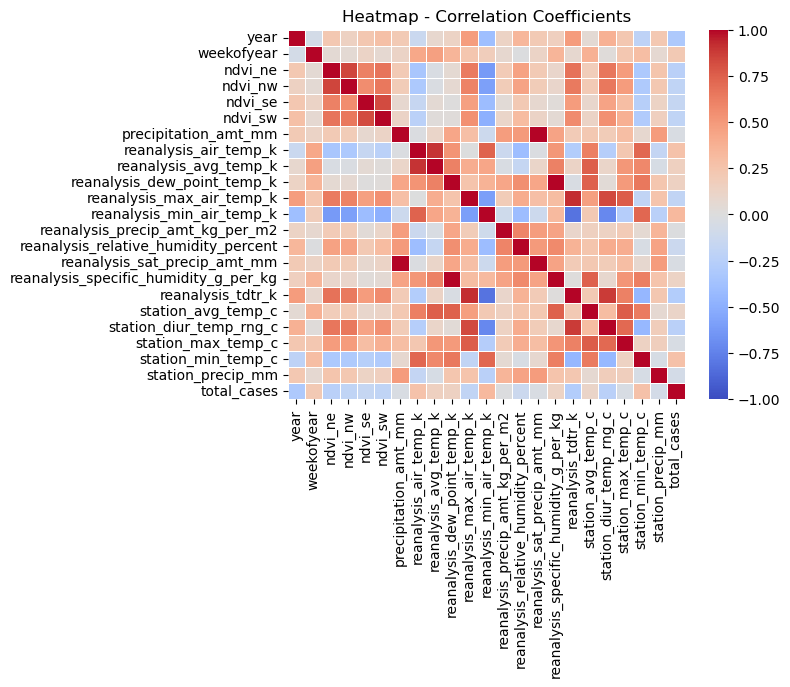

In [26]:
# Correlation heatmap

sns.heatmap(corr, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)
plt.title('Heatmap - Correlation Coefficients')
# plt.savefig('plots/heatmap_corr.png')
plt.show()

In [27]:
df[['precipitation_amt_mm', 'reanalysis_sat_precip_amt_mm']].corr()

,precipitation_amt_mm,reanalysis_sat_precip_amt_mm
precipitation_amt_mm,1.0,1.0
reanalysis_sat_precip_amt_mm,1.0,1.0


In [28]:
df[['reanalysis_dew_point_temp_k', 'reanalysis_specific_humidity_g_per_kg']].corr()

,reanalysis_dew_point_temp_k,reanalysis_specific_humidity_g_per_kg
reanalysis_dew_point_temp_k,1.000000,0.997051
reanalysis_specific_humidity_g_per_kg,0.997051,1.000000


Check whether the maximum and minimum temperatures are redundant with the average temperature and temperature range.

In [29]:
df1 = df.copy()
df1

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,297.742857,292.414286,299.8,295.9,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,298.442857,293.951429,300.9,296.4,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,298.878571,295.434286,300.5,297.3,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,299.228571,295.310000,301.4,297.0,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,299.664286,295.821429,301.9,297.5,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1451,iq,2010,21,2010-05-28,0.342750,0.318900,0.256343,0.292514,55.30,299.334286,300.771429,296.825714,309.7,294.5,45.00,88.765714,55.30,18.485714,9.800000,28.633333,11.933333,35.4,22.4,27.0,5
1452,iq,2010,22,2010-06-04,0.160157,0.160371,0.136043,0.225657,86.47,298.330000,299.392857,296.452857,308.5,291.9,207.10,91.600000,86.47,18.070000,7.471429,27.433333,10.500000,34.7,21.7,36.6,8
1453,iq,2010,23,2010-06-11,0.247057,0.146057,0.250357,0.233714,58.94,296.598571,297.592857,295.501429,305.5,292.4,50.60,94.280000,58.94,17.008571,7.500000,24.400000,6.900000,32.2,19.2,7.4,1
1454,iq,2010,24,2010-06-18,0.333914,0.245771,0.278886,0.325486,59.67,296.345714,297.521429,295.324286,306.1,291.9,62.33,94.660000,59.67,16.815714,7.871429,25.433333,8.733333,31.2,21.0,16.0,1


In [30]:
# Calculate average temperature using max and min
df1['reanalysis_calculate_avg_temp_k'] = (df1['reanalysis_max_air_temp_k'] + df1['reanalysis_min_air_temp_k']) / 2
df1['reanalysis_calculate_avg_temp_k']

0       297.85
1       298.65
2       298.90
3       299.20
4       299.70
         ...  
1451    302.10
1452    300.20
1453    298.95
1454    299.00
1455    300.05
Name: reanalysis_calculate_avg_temp_k, Length: 1456, dtype: float64

In [31]:
# Calculate range using max and min
df1['reanalysis_calculate_range_temp_k'] = df1['reanalysis_max_air_temp_k'] - df1['reanalysis_min_air_temp_k']
df1['reanalysis_calculate_range_temp_k']

0        3.9
1        4.5
2        3.2
3        4.4
4        4.4
        ... 
1451    15.2
1452    16.6
1453    13.1
1454    14.2
1455    15.5
Name: reanalysis_calculate_range_temp_k, Length: 1456, dtype: float64

In [32]:
df1[['reanalysis_air_temp_k', 'reanalysis_avg_temp_k', 'reanalysis_calculate_avg_temp_k']].corr()

,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_calculate_avg_temp_k
reanalysis_air_temp_k,1.000000,0.901777,0.709254
reanalysis_avg_temp_k,0.901777,1.000000,0.905621
reanalysis_calculate_avg_temp_k,0.709254,0.905621,1.000000


In [33]:
df1[['reanalysis_tdtr_k', 'reanalysis_calculate_range_temp_k']].corr()

,reanalysis_tdtr_k,reanalysis_calculate_range_temp_k
reanalysis_tdtr_k,1.000000,0.974159
reanalysis_calculate_range_temp_k,0.974159,1.000000


In [34]:
df1['station_calculate_avg_temp_c'] = (df1['station_max_temp_c'] + df1['station_min_temp_c']) / 2
df1['station_calculate_avg_temp_c']

0       24.70
1       26.95
2       27.50
3       28.30
4       29.45
        ...  
1451    28.90
1452    28.20
1453    25.70
1454    26.10
1455    27.95
Name: station_calculate_avg_temp_c, Length: 1456, dtype: float64

In [35]:
df1['station_calculate_range_temp_c'] = df1['station_max_temp_c'] - df1['station_min_temp_c']
df1['station_calculate_range_temp_c']

0        9.4
1        9.5
2        9.4
3       10.0
4       11.1
        ... 
1451    13.0
1452    13.0
1453    13.0
1454    10.2
1455    11.5
Name: station_calculate_range_temp_c, Length: 1456, dtype: float64

In [36]:
df1[['station_avg_temp_c', 'station_calculate_avg_temp_c']].corr()

,station_avg_temp_c,station_calculate_avg_temp_c
station_avg_temp_c,1.000000,0.927685
station_calculate_avg_temp_c,0.927685,1.000000


In [37]:
df1[['station_diur_temp_rng_c', 'station_calculate_range_temp_c']].corr()

,station_diur_temp_rng_c,station_calculate_range_temp_c
station_diur_temp_rng_c,1.000000,0.901208
station_calculate_range_temp_c,0.901208,1.000000


## Data Preprocessing and Feature Engineering

### Drop features

In [38]:
data1 = data.copy()
data1

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,297.742857,292.414286,299.8,295.9,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,298.442857,293.951429,300.9,296.4,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,298.878571,295.434286,300.5,297.3,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,299.228571,295.310000,301.4,297.0,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,299.664286,295.821429,301.9,297.5,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1451,iq,2010,21,2010-05-28,0.342750,0.318900,0.256343,0.292514,55.30,299.334286,300.771429,296.825714,309.7,294.5,45.00,88.765714,55.30,18.485714,9.800000,28.633333,11.933333,35.4,22.4,27.0
1452,iq,2010,22,2010-06-04,0.160157,0.160371,0.136043,0.225657,86.47,298.330000,299.392857,296.452857,308.5,291.9,207.10,91.600000,86.47,18.070000,7.471429,27.433333,10.500000,34.7,21.7,36.6
1453,iq,2010,23,2010-06-11,0.247057,0.146057,0.250357,0.233714,58.94,296.598571,297.592857,295.501429,305.5,292.4,50.60,94.280000,58.94,17.008571,7.500000,24.400000,6.900000,32.2,19.2,7.4
1454,iq,2010,24,2010-06-18,0.333914,0.245771,0.278886,0.325486,59.67,296.345714,297.521429,295.324286,306.1,291.9,62.33,94.660000,59.67,16.815714,7.871429,25.433333,8.733333,31.2,21.0,16.0


In [39]:
# Drop the features that have high correlation with other features and useless time features
data1.drop(['precipitation_amt_mm', 'reanalysis_dew_point_temp_k', 'reanalysis_tdtr_k', 'year', 'week_start_date'], axis=1, inplace=True)
data1

,city,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,18,0.122600,0.103725,0.198483,0.177617,297.572857,297.742857,299.8,295.9,32.00,73.365714,12.42,14.012857,25.442857,6.900000,29.4,20.0,16.0
1,sj,19,0.169900,0.142175,0.162357,0.155486,298.211429,298.442857,300.9,296.4,17.94,77.368571,22.82,15.372857,26.714286,6.371429,31.7,22.2,8.6
2,sj,20,0.032250,0.172967,0.157200,0.170843,298.781429,298.878571,300.5,297.3,26.10,82.052857,34.54,16.848571,26.714286,6.485714,32.2,22.8,41.4
3,sj,21,0.128633,0.245067,0.227557,0.235886,298.987143,299.228571,301.4,297.0,13.90,80.337143,15.36,16.672857,27.471429,6.771429,33.3,23.3,4.0
4,sj,22,0.196200,0.262200,0.251200,0.247340,299.518571,299.664286,301.9,297.5,12.20,80.460000,7.52,17.210000,28.942857,9.371429,35.0,23.9,5.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1451,iq,21,0.342750,0.318900,0.256343,0.292514,299.334286,300.771429,309.7,294.5,45.00,88.765714,55.30,18.485714,28.633333,11.933333,35.4,22.4,27.0
1452,iq,22,0.160157,0.160371,0.136043,0.225657,298.330000,299.392857,308.5,291.9,207.10,91.600000,86.47,18.070000,27.433333,10.500000,34.7,21.7,36.6
1453,iq,23,0.247057,0.146057,0.250357,0.233714,296.598571,297.592857,305.5,292.4,50.60,94.280000,58.94,17.008571,24.400000,6.900000,32.2,19.2,7.4
1454,iq,24,0.333914,0.245771,0.278886,0.325486,296.345714,297.521429,306.1,291.9,62.33,94.660000,59.67,16.815714,25.433333,8.733333,31.2,21.0,16.0


In [40]:
target1 = target.copy()
target1

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,2008,18,2008-04-29,-0.018900,-0.018900,0.102729,0.091200,78.60,298.492857,298.550000,294.527143,301.1,296.4,25.37,78.781429,78.60,15.918571,3.128571,26.528571,7.057143,33.3,21.7,75.2
1,sj,2008,19,2008-05-06,-0.018000,-0.012400,0.082043,0.072314,12.56,298.475714,298.557143,294.395714,300.8,296.7,21.83,78.230000,12.56,15.791429,2.571429,26.071429,5.557143,30.0,22.2,34.3
2,sj,2008,20,2008-05-13,-0.001500,NaN,0.151083,0.091529,3.66,299.455714,299.357143,295.308571,302.2,296.4,4.12,78.270000,3.66,16.674286,4.428571,27.928571,7.785714,32.8,22.8,3.0
3,sj,2008,21,2008-05-20,NaN,-0.019867,0.124329,0.125686,0.00,299.690000,299.728571,294.402857,303.0,296.9,2.20,73.015714,0.00,15.775714,4.342857,28.057143,6.271429,33.3,24.4,0.3
4,sj,2008,22,2008-05-27,0.056800,0.039833,0.062267,0.075914,0.76,299.780000,299.671429,294.760000,302.3,297.3,4.36,74.084286,0.76,16.137143,3.542857,27.614286,7.085714,33.3,23.3,84.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
411,iq,2013,22,2013-05-28,0.301471,0.380029,0.280629,0.383186,41.12,297.774286,298.964286,295.638571,305.5,292.7,67.60,89.990000,41.12,17.185714,10.100000,27.400000,9.050000,32.6,21.8,33.0
412,iq,2013,23,2013-06-04,0.247600,0.296343,0.285371,0.350357,71.52,297.167143,298.328571,295.845714,306.3,291.6,45.70,93.891429,71.52,17.448571,9.657143,27.520000,10.720000,33.8,21.4,68.0
413,iq,2013,24,2013-06-11,0.238729,0.251029,0.252586,0.249771,78.96,295.831429,296.607143,294.894286,304.6,290.7,45.22,94.967143,78.96,16.410000,7.385714,27.200000,10.075000,32.6,21.6,93.2
414,iq,2013,25,2013-06-18,0.310429,0.302700,0.406614,0.403943,39.54,295.778571,297.400000,293.648571,305.9,292.5,4.70,89.057143,39.54,15.137143,8.228571,26.700000,8.480000,32.2,21.8,34.1


In [41]:
# Perform the same action on the target data
target1.drop(['precipitation_amt_mm', 'reanalysis_dew_point_temp_k', 'reanalysis_tdtr_k', 'year', 'week_start_date'], axis=1, inplace=True)
target1

,city,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,18,-0.018900,-0.018900,0.102729,0.091200,298.492857,298.550000,301.1,296.4,25.37,78.781429,78.60,15.918571,26.528571,7.057143,33.3,21.7,75.2
1,sj,19,-0.018000,-0.012400,0.082043,0.072314,298.475714,298.557143,300.8,296.7,21.83,78.230000,12.56,15.791429,26.071429,5.557143,30.0,22.2,34.3
2,sj,20,-0.001500,NaN,0.151083,0.091529,299.455714,299.357143,302.2,296.4,4.12,78.270000,3.66,16.674286,27.928571,7.785714,32.8,22.8,3.0
3,sj,21,NaN,-0.019867,0.124329,0.125686,299.690000,299.728571,303.0,296.9,2.20,73.015714,0.00,15.775714,28.057143,6.271429,33.3,24.4,0.3
4,sj,22,0.056800,0.039833,0.062267,0.075914,299.780000,299.671429,302.3,297.3,4.36,74.084286,0.76,16.137143,27.614286,7.085714,33.3,23.3,84.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
411,iq,22,0.301471,0.380029,0.280629,0.383186,297.774286,298.964286,305.5,292.7,67.60,89.990000,41.12,17.185714,27.400000,9.050000,32.6,21.8,33.0
412,iq,23,0.247600,0.296343,0.285371,0.350357,297.167143,298.328571,306.3,291.6,45.70,93.891429,71.52,17.448571,27.520000,10.720000,33.8,21.4,68.0
413,iq,24,0.238729,0.251029,0.252586,0.249771,295.831429,296.607143,304.6,290.7,45.22,94.967143,78.96,16.410000,27.200000,10.075000,32.6,21.6,93.2
414,iq,25,0.310429,0.302700,0.406614,0.403943,295.778571,297.400000,305.9,292.5,4.70,89.057143,39.54,15.137143,26.700000,8.480000,32.2,21.8,34.1


In [42]:
label1 = label.copy()
label1

,city,year,weekofyear,total_cases
0,sj,1990,18,4
1,sj,1990,19,5
2,sj,1990,20,4
3,sj,1990,21,3
4,sj,1990,22,6
...,...,...,...,...
1451,iq,2010,21,5
1452,iq,2010,22,8
1453,iq,2010,23,1
1454,iq,2010,24,1


In [43]:
label1.drop(['year', 'weekofyear'], axis=1, inplace=True)
label1

,city,total_cases
0,sj,4
1,sj,5
2,sj,4
3,sj,3
4,sj,6
...,...,...
1451,iq,5
1452,iq,8
1453,iq,1
1454,iq,1


### Temperature columns: Kelvin to Celsius

In [44]:
data1[['reanalysis_air_temp_k', 'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k', 'reanalysis_avg_temp_k']] -= 273.15
target1[['reanalysis_air_temp_k', 'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k', 'reanalysis_avg_temp_k']] -= 273.15

### Vegetation features integration

In [45]:
data1['ndvi_n'] = data1[['ndvi_ne', 'ndvi_nw']].mean(axis=1)
data1['ndvi_s'] = data1[['ndvi_se', 'ndvi_sw']].mean(axis=1)
data1.drop(['ndvi_ne', 'ndvi_nw', 'ndvi_se', 'ndvi_sw'], axis=1, inplace=True)


target1['ndvi_n'] = target1[['ndvi_ne', 'ndvi_nw']].mean(axis=1)
target1['ndvi_s'] = target1[['ndvi_se', 'ndvi_sw']].mean(axis=1)
target1.drop(['ndvi_ne', 'ndvi_nw', 'ndvi_se', 'ndvi_sw'], axis=1, inplace=True)

In [46]:
data1

,city,weekofyear,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,ndvi_n,ndvi_s
0,sj,18,24.422857,24.592857,26.65,22.75,32.00,73.365714,12.42,14.012857,25.442857,6.900000,29.4,20.0,16.0,0.113162,0.188050
1,sj,19,25.061429,25.292857,27.75,23.25,17.94,77.368571,22.82,15.372857,26.714286,6.371429,31.7,22.2,8.6,0.156037,0.158921
2,sj,20,25.631429,25.728571,27.35,24.15,26.10,82.052857,34.54,16.848571,26.714286,6.485714,32.2,22.8,41.4,0.102608,0.164021
3,sj,21,25.837143,26.078571,28.25,23.85,13.90,80.337143,15.36,16.672857,27.471429,6.771429,33.3,23.3,4.0,0.186850,0.231721
4,sj,22,26.368571,26.514286,28.75,24.35,12.20,80.460000,7.52,17.210000,28.942857,9.371429,35.0,23.9,5.8,0.229200,0.249270
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1451,iq,21,26.184286,27.621429,36.55,21.35,45.00,88.765714,55.30,18.485714,28.633333,11.933333,35.4,22.4,27.0,0.330825,0.274429
1452,iq,22,25.180000,26.242857,35.35,18.75,207.10,91.600000,86.47,18.070000,27.433333,10.500000,34.7,21.7,36.6,0.160264,0.180850
1453,iq,23,23.448571,24.442857,32.35,19.25,50.60,94.280000,58.94,17.008571,24.400000,6.900000,32.2,19.2,7.4,0.196557,0.242036
1454,iq,24,23.195714,24.371429,32.95,18.75,62.33,94.660000,59.67,16.815714,25.433333,8.733333,31.2,21.0,16.0,0.289843,0.302186


### Separate two cities

In [47]:
# Separate cities

data_sj = data1[data1['city'] == 'sj'].drop('city', axis=1)
data_sj

,weekofyear,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,ndvi_n,ndvi_s
0,18,24.422857,24.592857,26.65,22.75,32.00,73.365714,12.42,14.012857,25.442857,6.900000,29.4,20.0,16.0,0.113162,0.188050
1,19,25.061429,25.292857,27.75,23.25,17.94,77.368571,22.82,15.372857,26.714286,6.371429,31.7,22.2,8.6,0.156037,0.158921
2,20,25.631429,25.728571,27.35,24.15,26.10,82.052857,34.54,16.848571,26.714286,6.485714,32.2,22.8,41.4,0.102608,0.164021
3,21,25.837143,26.078571,28.25,23.85,13.90,80.337143,15.36,16.672857,27.471429,6.771429,33.3,23.3,4.0,0.186850,0.231721
4,22,26.368571,26.514286,28.75,24.35,12.20,80.460000,7.52,17.210000,28.942857,9.371429,35.0,23.9,5.8,0.229200,0.249270
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
931,13,23.808571,23.807143,26.55,21.25,7.55,74.247143,27.19,13.644286,25.042857,5.785714,30.0,21.1,1.8,0.018975,0.303357
932,14,24.931429,25.078571,26.65,23.35,3.67,74.600000,3.82,14.662857,26.242857,6.814286,30.6,22.2,0.5,-0.027417,0.092879
933,15,24.310000,24.414286,26.25,22.65,35.00,75.027143,16.96,14.184286,25.000000,5.714286,29.4,21.7,30.7,-0.103975,0.139486
934,16,24.480000,24.628571,26.55,22.75,4.82,72.285714,0.00,13.858571,25.314286,6.242857,29.4,21.7,11.2,0.001800,0.206871


In [48]:
data_iq = data1[data1['city'] == 'iq'].drop('city', axis=1)
data_iq

,weekofyear,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,ndvi_n,ndvi_s
936,26,23.590000,25.300000,34.15,19.95,43.19,92.418571,25.41,16.651429,26.400000,10.775000,32.5,20.7,3.0,0.162571,0.294043
937,27,23.484286,25.278571,33.45,17.95,46.00,93.581429,60.61,16.862857,26.900000,11.566667,34.0,20.8,55.6,0.246467,0.265557
938,28,23.265714,24.242857,31.35,19.45,64.77,95.848571,55.52,17.120000,26.800000,11.466667,33.0,20.7,38.1,0.174943,0.166064
939,29,22.207143,23.078571,30.45,15.45,23.96,87.234286,5.60,14.431429,25.766667,10.533333,31.5,14.7,30.0,0.186579,0.227257
940,30,23.282857,24.485714,33.85,18.35,31.80,88.161429,62.76,15.444286,26.600000,11.480000,33.3,19.1,4.0,0.325386,0.307707
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1451,21,26.184286,27.621429,36.55,21.35,45.00,88.765714,55.30,18.485714,28.633333,11.933333,35.4,22.4,27.0,0.330825,0.274429
1452,22,25.180000,26.242857,35.35,18.75,207.10,91.600000,86.47,18.070000,27.433333,10.500000,34.7,21.7,36.6,0.160264,0.180850
1453,23,23.448571,24.442857,32.35,19.25,50.60,94.280000,58.94,17.008571,24.400000,6.900000,32.2,19.2,7.4,0.196557,0.242036
1454,24,23.195714,24.371429,32.95,18.75,62.33,94.660000,59.67,16.815714,25.433333,8.733333,31.2,21.0,16.0,0.289843,0.302186


In [49]:
label_sj = label1[label['city'] == 'sj'].drop('city', axis=1)
label_sj

,total_cases
0,4
1,5
2,4
3,3
4,6
...,...
931,4
932,3
933,1
934,3


In [50]:
label_iq = label1[label['city'] == 'iq'].drop('city', axis=1)
label_iq

,total_cases
936,0
937,0
938,0
939,0
940,0
...,...
1451,5
1452,8
1453,1
1454,1


In [51]:
target_sj = target1[target1['city'] == 'sj'].drop('city', axis=1)
target_sj

,weekofyear,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,ndvi_n,ndvi_s
0,18,25.342857,25.400000,27.95,23.25,25.37,78.781429,78.60,15.918571,26.528571,7.057143,33.3,21.7,75.2,-0.018900,0.096964
1,19,25.325714,25.407143,27.65,23.55,21.83,78.230000,12.56,15.791429,26.071429,5.557143,30.0,22.2,34.3,-0.015200,0.077179
2,20,26.305714,26.207143,29.05,23.25,4.12,78.270000,3.66,16.674286,27.928571,7.785714,32.8,22.8,3.0,-0.001500,0.121306
3,21,26.540000,26.578571,29.85,23.75,2.20,73.015714,0.00,15.775714,28.057143,6.271429,33.3,24.4,0.3,-0.019867,0.125007
4,22,26.630000,26.521429,29.15,24.15,4.36,74.084286,0.76,16.137143,27.614286,7.085714,33.3,23.3,84.1,0.048317,0.069090
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,13,25.520000,25.735714,28.15,23.25,2.55,78.780000,30.34,15.985714,27.542857,7.942857,33.9,22.8,3.5,-0.051792,0.130764
256,14,24.885714,25.007143,28.35,22.75,64.30,81.650000,6.55,15.881429,26.642857,6.642857,33.3,22.8,17.6,-0.140542,0.191543
257,15,25.907143,26.178571,28.35,24.35,0.70,78.285714,0.00,16.212857,27.914286,8.114286,32.8,23.3,9.4,-0.062900,0.181564
258,16,25.762857,25.914286,27.75,24.15,1.40,77.674286,0.00,15.965714,27.728571,6.942857,31.7,23.9,22.9,0.056975,0.104936


In [52]:
target_iq = target1[target1['city'] == 'iq'].drop('city', axis=1)
target_iq

,weekofyear,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,ndvi_n,ndvi_s
260,26,24.498571,26.064286,34.75,20.55,34.11,92.581429,82.29,17.654286,27.440,10.760,33.8,21.5,11.2,0.163142,0.187671
261,27,25.074286,26.314286,34.55,19.05,9.10,83.885714,25.30,16.320000,27.025,9.625,33.0,21.2,8.9,0.281962,0.325807
262,28,24.805714,25.814286,33.25,19.35,61.09,92.057143,62.14,18.030000,26.950,10.350,33.4,21.6,22.6,0.287500,0.234071
263,29,22.565714,23.492857,33.25,16.15,19.60,88.970000,47.80,15.394286,26.900,9.700,33.3,14.2,4.8,0.076250,0.102007
264,30,25.352857,26.850000,34.95,17.35,18.93,78.610000,56.30,15.468571,27.050,11.850,33.5,16.9,3.0,0.316892,0.259000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
411,22,24.624286,25.814286,32.35,19.55,67.60,89.990000,41.12,17.185714,27.400,9.050,32.6,21.8,33.0,0.340750,0.331907
412,23,24.017143,25.178571,33.15,18.45,45.70,93.891429,71.52,17.448571,27.520,10.720,33.8,21.4,68.0,0.271971,0.317864
413,24,22.681429,23.457143,31.45,17.55,45.22,94.967143,78.96,16.410000,27.200,10.075,32.6,21.6,93.2,0.244879,0.251179
414,25,22.628571,24.250000,32.75,19.35,4.70,89.057143,39.54,15.137143,26.700,8.480,32.2,21.8,34.1,0.306564,0.405279


In [53]:
data_sj.columns

Index(['weekofyear', 'reanalysis_air_temp_k', 'reanalysis_avg_temp_k',
       'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k',
       'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm',
       'reanalysis_specific_humidity_g_per_kg', 'station_avg_temp_c',
       'station_diur_temp_rng_c', 'station_max_temp_c', 'station_min_temp_c',
       'station_precip_mm', 'ndvi_n', 'ndvi_s'],
      dtype='object')

In [54]:
num_cols = ['reanalysis_air_temp_k', 'reanalysis_avg_temp_k',
       'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k',
       'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm',
       'reanalysis_specific_humidity_g_per_kg', 'station_avg_temp_c',
       'station_diur_temp_rng_c', 'station_max_temp_c', 'station_min_temp_c',
       'station_precip_mm', 'ndvi_n', 'ndvi_s']

### Handle missing data

In [55]:
# Impute missing data with median

medians_sj = data_sj[num_cols].median()
data_sj[num_cols] = data_sj[num_cols].fillna(medians_sj)
target_sj[num_cols] = target_sj[num_cols].fillna(medians_sj)

data_sj

,weekofyear,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,ndvi_n,ndvi_s
0,18,24.422857,24.592857,26.65,22.75,32.00,73.365714,12.42,14.012857,25.442857,6.900000,29.4,20.0,16.0,0.113162,0.188050
1,19,25.061429,25.292857,27.75,23.25,17.94,77.368571,22.82,15.372857,26.714286,6.371429,31.7,22.2,8.6,0.156037,0.158921
2,20,25.631429,25.728571,27.35,24.15,26.10,82.052857,34.54,16.848571,26.714286,6.485714,32.2,22.8,41.4,0.102608,0.164021
3,21,25.837143,26.078571,28.25,23.85,13.90,80.337143,15.36,16.672857,27.471429,6.771429,33.3,23.3,4.0,0.186850,0.231721
4,22,26.368571,26.514286,28.75,24.35,12.20,80.460000,7.52,17.210000,28.942857,9.371429,35.0,23.9,5.8,0.229200,0.249270
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
931,13,23.808571,23.807143,26.55,21.25,7.55,74.247143,27.19,13.644286,25.042857,5.785714,30.0,21.1,1.8,0.018975,0.303357
932,14,24.931429,25.078571,26.65,23.35,3.67,74.600000,3.82,14.662857,26.242857,6.814286,30.6,22.2,0.5,-0.027417,0.092879
933,15,24.310000,24.414286,26.25,22.65,35.00,75.027143,16.96,14.184286,25.000000,5.714286,29.4,21.7,30.7,-0.103975,0.139486
934,16,24.480000,24.628571,26.55,22.75,4.82,72.285714,0.00,13.858571,25.314286,6.242857,29.4,21.7,11.2,0.001800,0.206871


In [56]:
data_sj.isnull().sum()

weekofyear                               0
reanalysis_air_temp_k                    0
reanalysis_avg_temp_k                    0
reanalysis_max_air_temp_k                0
reanalysis_min_air_temp_k                0
reanalysis_precip_amt_kg_per_m2          0
reanalysis_relative_humidity_percent     0
reanalysis_sat_precip_amt_mm             0
reanalysis_specific_humidity_g_per_kg    0
station_avg_temp_c                       0
station_diur_temp_rng_c                  0
station_max_temp_c                       0
station_min_temp_c                       0
station_precip_mm                        0
ndvi_n                                   0
ndvi_s                                   0
dtype: int64

In [57]:
medians_iq = data_iq[num_cols].median()
data_iq[num_cols] = data_iq[num_cols].fillna(medians_sj)
target_iq[num_cols] = target_iq[num_cols].fillna(medians_sj)

data_iq

,weekofyear,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,ndvi_n,ndvi_s
936,26,23.590000,25.300000,34.15,19.95,43.19,92.418571,25.41,16.651429,26.400000,10.775000,32.5,20.7,3.0,0.162571,0.294043
937,27,23.484286,25.278571,33.45,17.95,46.00,93.581429,60.61,16.862857,26.900000,11.566667,34.0,20.8,55.6,0.246467,0.265557
938,28,23.265714,24.242857,31.35,19.45,64.77,95.848571,55.52,17.120000,26.800000,11.466667,33.0,20.7,38.1,0.174943,0.166064
939,29,22.207143,23.078571,30.45,15.45,23.96,87.234286,5.60,14.431429,25.766667,10.533333,31.5,14.7,30.0,0.186579,0.227257
940,30,23.282857,24.485714,33.85,18.35,31.80,88.161429,62.76,15.444286,26.600000,11.480000,33.3,19.1,4.0,0.325386,0.307707
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1451,21,26.184286,27.621429,36.55,21.35,45.00,88.765714,55.30,18.485714,28.633333,11.933333,35.4,22.4,27.0,0.330825,0.274429
1452,22,25.180000,26.242857,35.35,18.75,207.10,91.600000,86.47,18.070000,27.433333,10.500000,34.7,21.7,36.6,0.160264,0.180850
1453,23,23.448571,24.442857,32.35,19.25,50.60,94.280000,58.94,17.008571,24.400000,6.900000,32.2,19.2,7.4,0.196557,0.242036
1454,24,23.195714,24.371429,32.95,18.75,62.33,94.660000,59.67,16.815714,25.433333,8.733333,31.2,21.0,16.0,0.289843,0.302186


In [58]:
data_iq.isnull().sum()

weekofyear                               0
reanalysis_air_temp_k                    0
reanalysis_avg_temp_k                    0
reanalysis_max_air_temp_k                0
reanalysis_min_air_temp_k                0
reanalysis_precip_amt_kg_per_m2          0
reanalysis_relative_humidity_percent     0
reanalysis_sat_precip_amt_mm             0
reanalysis_specific_humidity_g_per_kg    0
station_avg_temp_c                       0
station_diur_temp_rng_c                  0
station_max_temp_c                       0
station_min_temp_c                       0
station_precip_mm                        0
ndvi_n                                   0
ndvi_s                                   0
dtype: int64

In [59]:
target_iq.isnull().sum()

weekofyear                               0
reanalysis_air_temp_k                    0
reanalysis_avg_temp_k                    0
reanalysis_max_air_temp_k                0
reanalysis_min_air_temp_k                0
reanalysis_precip_amt_kg_per_m2          0
reanalysis_relative_humidity_percent     0
reanalysis_sat_precip_amt_mm             0
reanalysis_specific_humidity_g_per_kg    0
station_avg_temp_c                       0
station_diur_temp_rng_c                  0
station_max_temp_c                       0
station_min_temp_c                       0
station_precip_mm                        0
ndvi_n                                   0
ndvi_s                                   0
dtype: int64

### Lag features

In [60]:
# Put data and target together
all_sj = pd.concat([data_sj, target_sj], ignore_index=True)
all_iq = pd.concat([data_iq, target_iq], ignore_index=True)

all_sj

,weekofyear,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,ndvi_n,ndvi_s
0,18,24.422857,24.592857,26.65,22.75,32.00,73.365714,12.42,14.012857,25.442857,6.900000,29.4,20.0,16.0,0.113162,0.188050
1,19,25.061429,25.292857,27.75,23.25,17.94,77.368571,22.82,15.372857,26.714286,6.371429,31.7,22.2,8.6,0.156037,0.158921
2,20,25.631429,25.728571,27.35,24.15,26.10,82.052857,34.54,16.848571,26.714286,6.485714,32.2,22.8,41.4,0.102608,0.164021
3,21,25.837143,26.078571,28.25,23.85,13.90,80.337143,15.36,16.672857,27.471429,6.771429,33.3,23.3,4.0,0.186850,0.231721
4,22,26.368571,26.514286,28.75,24.35,12.20,80.460000,7.52,17.210000,28.942857,9.371429,35.0,23.9,5.8,0.229200,0.249270
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1191,13,25.520000,25.735714,28.15,23.25,2.55,78.780000,30.34,15.985714,27.542857,7.942857,33.9,22.8,3.5,-0.051792,0.130764
1192,14,24.885714,25.007143,28.35,22.75,64.30,81.650000,6.55,15.881429,26.642857,6.642857,33.3,22.8,17.6,-0.140542,0.191543
1193,15,25.907143,26.178571,28.35,24.35,0.70,78.285714,0.00,16.212857,27.914286,8.114286,32.8,23.3,9.4,-0.062900,0.181564
1194,16,25.762857,25.914286,27.75,24.15,1.40,77.674286,0.00,15.965714,27.728571,6.942857,31.7,23.9,22.9,0.056975,0.104936


In [61]:
# Lag features are generated to capture the impact of historical trends and seasonality on the current value of the target variable
def add_lag_features(df, lags=[5, 10], exclude_cols=None):
    df = df.copy()

    for feature in num_cols:
        for lag in lags:
            lagged_feature = f'{feature}_last{lag}'
            df[lagged_feature] = df[feature].rolling(window=lag, min_periods=1).mean()
    
    return df

all_sj_lagged = add_lag_features(all_sj, lags=[5, 10])
all_iq_lagged = add_lag_features(all_iq, lags=[5, 10])

In [62]:
all_sj_lagged

,weekofyear,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,ndvi_n,ndvi_s,reanalysis_air_temp_k_last5,reanalysis_air_temp_k_last10,reanalysis_avg_temp_k_last5,reanalysis_avg_temp_k_last10,reanalysis_max_air_temp_k_last5,reanalysis_max_air_temp_k_last10,reanalysis_min_air_temp_k_last5,reanalysis_min_air_temp_k_last10,reanalysis_precip_amt_kg_per_m2_last5,reanalysis_precip_amt_kg_per_m2_last10,reanalysis_relative_humidity_percent_last5,reanalysis_relative_humidity_percent_last10,reanalysis_sat_precip_amt_mm_last5,reanalysis_sat_precip_amt_mm_last10,reanalysis_specific_humidity_g_per_kg_last5,reanalysis_specific_humidity_g_per_kg_last10,station_avg_temp_c_last5,station_avg_temp_c_last10,station_diur_temp_rng_c_last5,station_diur_temp_rng_c_last10,station_max_temp_c_last5,station_max_temp_c_last10,station_min_temp_c_last5,station_min_temp_c_last10,station_precip_mm_last5,station_precip_mm_last10,ndvi_n_last5,ndvi_n_last10,ndvi_s_last5,ndvi_s_last10
0,18,24.422857,24.592857,26.65,22.75,32.00,73.365714,12.42,14.012857,25.442857,6.900000,29.4,20.0,16.0,0.113162,0.188050,24.422857,24.422857,24.592857,24.592857,26.65,26.65,22.750000,22.750000,32.000000,32.000000,73.365714,73.365714,12.420,12.420,14.012857,14.012857,25.442857,25.442857,6.900000,6.900000,29.40,29.40,20.000000,20.000000,16.00,16.00,0.113162,0.113162,0.188050,0.188050
1,19,25.061429,25.292857,27.75,23.25,17.94,77.368571,22.82,15.372857,26.714286,6.371429,31.7,22.2,8.6,0.156037,0.158921,24.742143,24.742143,24.942857,24.942857,27.20,27.20,23.000000,23.000000,24.970000,24.970000,75.367143,75.367143,17.620,17.620,14.692857,14.692857,26.078571,26.078571,6.635714,6.635714,30.55,30.55,21.100000,21.100000,12.30,12.30,0.134600,0.134600,0.173486,0.173486
2,20,25.631429,25.728571,27.35,24.15,26.10,82.052857,34.54,16.848571,26.714286,6.485714,32.2,22.8,41.4,0.102608,0.164021,25.038571,25.038571,25.204762,25.204762,27.25,27.25,23.383333,23.383333,25.346667,25.346667,77.595714,77.595714,23.260,23.260,15.411429,15.411429,26.290476,26.290476,6.585714,6.585714,31.10,31.10,21.666667,21.666667,22.00,22.00,0.123936,0.123936,0.170331,0.170331
3,21,25.837143,26.078571,28.25,23.85,13.90,80.337143,15.36,16.672857,27.471429,6.771429,33.3,23.3,4.0,0.186850,0.231721,25.238214,25.238214,25.423214,25.423214,27.50,27.50,23.500000,23.500000,22.485000,22.485000,78.281071,78.281071,21.285,21.285,15.726786,15.726786,26.585714,26.585714,6.632143,6.632143,31.65,31.65,22.075000,22.075000,17.50,17.50,0.139665,0.139665,0.185679,0.185679
4,22,26.368571,26.514286,28.75,24.35,12.20,80.460000,7.52,17.210000,28.942857,9.371429,35.0,23.9,5.8,0.229200,0.249270,25.464286,25.464286,25.641429,25.641429,27.75,27.75,23.670000,23.670000,20.428000,20.428000,78.716857,78.716857,18.532,18.532,16.023429,16.023429,27.057143,27.057143,7.180000,7.180000,32.32,32.32,22.440000,22.440000,15.16,15.16,0.157572,0.157572,0.198397,0.198397
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1191,13,25.520000,25.735714,28.15,23.25,2.55,78.780000,30.34,15.985714,27.542857,7.942857,33.9,22.8,3.5,-0.051792,0.130764,24.729143,24.727429,24.884286,24.882143,27.21,27.09,22.690000,22.850000,5.390000,6.595000,73.295714,74.285286,10.680,5.340,14.203429,14.368714,26.242857,25.874286,6.974286,6.672857,31.22,30.55,22.020000,21.680000,7.22,11.01,-0.010532,0.015396,0.124736,0.151789
1192,14,24.885714,25.007143,28.35,22.75,64.30,81.650000,6.55,15.881429,26.642857,6.642857,33.3,22.8,17.6,-0.140542,0.191543,24.718571,24.768714,24.848571,24.912857,27.49,27.25,22.590000,22.860000,17.950000,12.195000,74.842286,74.883429,11.990,5.995,14.488571,14.517

In [63]:
all_sj_lagged.isnull().sum()

weekofyear                                      0
reanalysis_air_temp_k                           0
reanalysis_avg_temp_k                           0
reanalysis_max_air_temp_k                       0
reanalysis_min_air_temp_k                       0
reanalysis_precip_amt_kg_per_m2                 0
reanalysis_relative_humidity_percent            0
reanalysis_sat_precip_amt_mm                    0
reanalysis_specific_humidity_g_per_kg           0
station_avg_temp_c                              0
station_diur_temp_rng_c                         0
station_max_temp_c                              0
station_min_temp_c                              0
station_precip_mm                               0
ndvi_n                                          0
ndvi_s                                          0
reanalysis_air_temp_k_last5                     0
reanalysis_air_temp_k_last10                    0
reanalysis_avg_temp_k_last5                     0
reanalysis_avg_temp_k_last10                    0


In [64]:
all_iq_lagged.isnull().sum()

weekofyear                                      0
reanalysis_air_temp_k                           0
reanalysis_avg_temp_k                           0
reanalysis_max_air_temp_k                       0
reanalysis_min_air_temp_k                       0
reanalysis_precip_amt_kg_per_m2                 0
reanalysis_relative_humidity_percent            0
reanalysis_sat_precip_amt_mm                    0
reanalysis_specific_humidity_g_per_kg           0
station_avg_temp_c                              0
station_diur_temp_rng_c                         0
station_max_temp_c                              0
station_min_temp_c                              0
station_precip_mm                               0
ndvi_n                                          0
ndvi_s                                          0
reanalysis_air_temp_k_last5                     0
reanalysis_air_temp_k_last10                    0
reanalysis_avg_temp_k_last5                     0
reanalysis_avg_temp_k_last10                    0


### Manipulate data separately for different models

In [65]:
# Data for Dual Linear Regression
all_sj_dual = all_sj_lagged.copy()
all_iq_dual = all_iq_lagged.copy()
label_sj_dual = label_sj.values.ravel()
label_iq_dual = label_iq.values.ravel()

In [66]:
# Data for Random Forest
# Apply one-hot encoding to 'weekofyear'
all_sj_encoded = pd.get_dummies(all_sj_lagged, columns=['weekofyear'])
all_iq_encoded = pd.get_dummies(all_iq_lagged, columns=['weekofyear'])

all_sj_encoded

,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,ndvi_n,ndvi_s,reanalysis_air_temp_k_last5,reanalysis_air_temp_k_last10,reanalysis_avg_temp_k_last5,reanalysis_avg_temp_k_last10,reanalysis_max_air_temp_k_last5,reanalysis_max_air_temp_k_last10,reanalysis_min_air_temp_k_last5,reanalysis_min_air_temp_k_last10,reanalysis_precip_amt_kg_per_m2_last5,reanalysis_precip_amt_kg_per_m2_last10,reanalysis_relative_humidity_percent_last5,reanalysis_relative_humidity_percent_last10,reanalysis_sat_precip_amt_mm_last5,reanalysis_sat_precip_amt_mm_last10,reanalysis_specific_humidity_g_per_kg_last5,reanalysis_specific_humidity_g_per_kg_last10,station_avg_temp_c_last5,station_avg_temp_c_last10,station_diur_temp_rng_c_last5,station_diur_temp_rng_c_last10,station_max_temp_c_last5,station_max_temp_c_last10,station_min_temp_c_last5,station_min_temp_c_last10,station_precip_mm_last5,station_precip_mm_last10,ndvi_n_last5,ndvi_n_last10,ndvi_s_last5,ndvi_s_last10,weekofyear_1,weekofyear_2,weekofyear_3,weekofyear_4,weekofyear_5,weekofyear_6,weekofyear_7,weekofyear_8,weekofyear_9,weekofyear_10,weekofyear_11,weekofyear_12,weekofyear_13,weekofyear_14,weekofyear_15,weekofyear_16,weekofyear_17,weekofyear_18,weekofyear_19,weekofyear_20,weekofyear_21,weekofyear_22,weekofyear_23,weekofyear_24,weekofyear_25,weekofyear_26,weekofyear_27,weekofyear_28,weekofyear_29,weekofyear_30,weekofyear_31,weekofyear_32,weekofyear_33,weekofyear_34,weekofyear_35,weekofyear_36,weekofyear_37,weekofyear_38,weekofyear_39,weekofyear_40,weekofyear_41,weekofyear_42,weekofyear_43,weekofyear_44,weekofyear_45,weekofyear_46,weekofyear_47,weekofyear_48,weekofyear_49,weekofyear_50,weekofyear_51,weekofyear_52,weekofyear_53
0,24.422857,24.592857,26.65,22.75,32.00,73.365714,12.42,14.012857,25.442857,6.900000,29.4,20.0,16.0,0.113162,0.188050,24.422857,24.422857,24.592857,24.592857,26.65,26.65,22.750000,22.750000,32.000000,32.000000,73.365714,73.365714,12.420,12.420,14.012857,14.012857,25.442857,25.442857,6.900000,6.900000,29.40,29.40,20.000000,20.000000,16.00,16.00,0.113162,0.113162,0.188050,0.188050,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,25.061429,25.292857,27.75,23.25,17.94,77.368571,22.82,15.372857,26.714286,6.371429,31.7,22.2,8.6,0.156037,0.158921,24.742143,24.742143,24.942857,24.942857,27.20,27.20,23.000000,23.000000,24.970000,24.970000,75.367143,75.367143,17.620,17.620,14.692857,14.692857,26.078571,26.078571,6.635714,6.635714,30.55,30.55,21.100000,21.100000,12.30,12.30,0.134600,0.134600,0.173486,0.173486,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,25.631429,25.728571,27.35,24.15,26.10,82.052857,34.54,16.848571,26.714286,6.485714,32.2,22.8,41.4,0.102608,0.164021,25.038571,25.038571,25.204762,25.204762,27.25,27.25,23.383333,23.383333,25.346667,25.346667,77.595714,77.595714,23.260,23.260,15.411429,15.411429,26.290476,26.290476,6.585714,6.585714,31.10,31.10,21.666667,21.666667,22.00,22.00,0.123936,0.123936,0.170331,0.170331,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,

In [67]:
all_iq_encoded

,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,ndvi_n,ndvi_s,reanalysis_air_temp_k_last5,reanalysis_air_temp_k_last10,reanalysis_avg_temp_k_last5,reanalysis_avg_temp_k_last10,reanalysis_max_air_temp_k_last5,reanalysis_max_air_temp_k_last10,reanalysis_min_air_temp_k_last5,reanalysis_min_air_temp_k_last10,reanalysis_precip_amt_kg_per_m2_last5,reanalysis_precip_amt_kg_per_m2_last10,reanalysis_relative_humidity_percent_last5,reanalysis_relative_humidity_percent_last10,reanalysis_sat_precip_amt_mm_last5,reanalysis_sat_precip_amt_mm_last10,reanalysis_specific_humidity_g_per_kg_last5,reanalysis_specific_humidity_g_per_kg_last10,station_avg_temp_c_last5,station_avg_temp_c_last10,station_diur_temp_rng_c_last5,station_diur_temp_rng_c_last10,station_max_temp_c_last5,station_max_temp_c_last10,station_min_temp_c_last5,station_min_temp_c_last10,station_precip_mm_last5,station_precip_mm_last10,ndvi_n_last5,ndvi_n_last10,ndvi_s_last5,ndvi_s_last10,weekofyear_1,weekofyear_2,weekofyear_3,weekofyear_4,weekofyear_5,weekofyear_6,weekofyear_7,weekofyear_8,weekofyear_9,weekofyear_10,weekofyear_11,weekofyear_12,weekofyear_13,weekofyear_14,weekofyear_15,weekofyear_16,weekofyear_17,weekofyear_18,weekofyear_19,weekofyear_20,weekofyear_21,weekofyear_22,weekofyear_23,weekofyear_24,weekofyear_25,weekofyear_26,weekofyear_27,weekofyear_28,weekofyear_29,weekofyear_30,weekofyear_31,weekofyear_32,weekofyear_33,weekofyear_34,weekofyear_35,weekofyear_36,weekofyear_37,weekofyear_38,weekofyear_39,weekofyear_40,weekofyear_41,weekofyear_42,weekofyear_43,weekofyear_44,weekofyear_45,weekofyear_46,weekofyear_47,weekofyear_48,weekofyear_49,weekofyear_50,weekofyear_51,weekofyear_52,weekofyear_53
0,23.590000,25.300000,34.15,19.95,43.19,92.418571,25.41,16.651429,26.400000,10.775000,32.5,20.7,3.0,0.162571,0.294043,23.590000,23.590000,25.300000,25.300000,34.150000,34.150000,19.950000,19.950000,43.190,43.190,92.418571,92.418571,25.410,25.410,16.651429,16.651429,26.400000,26.400000,10.775000,10.775000,32.500000,32.500000,20.700000,20.700000,3.000000,3.000000,0.162571,0.162571,0.294043,0.294043,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,23.484286,25.278571,33.45,17.95,46.00,93.581429,60.61,16.862857,26.900000,11.566667,34.0,20.8,55.6,0.246467,0.265557,23.537143,23.537143,25.289286,25.289286,33.800000,33.800000,18.950000,18.950000,44.595,44.595,93.000000,93.000000,43.010,43.010,16.757143,16.757143,26.650000,26.650000,11.170833,11.170833,33.250000,33.250000,20.750000,20.750000,29.300000,29.300000,0.204519,0.204519,0.279800,0.279800,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,23.265714,24.242857,31.35,19.45,64.77,95.848571,55.52,17.120000,26.800000,11.466667,33.0,20.7,38.1,0.174943,0.166064,23.446667,23.446667,24.940476,24.940476,32.983333,32.983333,19.116667,19.116667,51.320,51.320,93.949524,93.949524,47.180,47.180,16.878095,16.878095,26.700000,26.700000,11.269444,11.269444,33.166667,33.166667,20.733333,20.733333,32.233333,32.233333,0.194660,0.194660,0.241888,0.241888,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False

In [68]:
# Separate data and target
data_sj_rf = all_sj_encoded.iloc[:len(data_sj)]
target_sj_rf = all_sj_encoded.iloc[len(data_sj):]
data_sj_rf

,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,ndvi_n,ndvi_s,reanalysis_air_temp_k_last5,reanalysis_air_temp_k_last10,reanalysis_avg_temp_k_last5,reanalysis_avg_temp_k_last10,reanalysis_max_air_temp_k_last5,reanalysis_max_air_temp_k_last10,reanalysis_min_air_temp_k_last5,reanalysis_min_air_temp_k_last10,reanalysis_precip_amt_kg_per_m2_last5,reanalysis_precip_amt_kg_per_m2_last10,reanalysis_relative_humidity_percent_last5,reanalysis_relative_humidity_percent_last10,reanalysis_sat_precip_amt_mm_last5,reanalysis_sat_precip_amt_mm_last10,reanalysis_specific_humidity_g_per_kg_last5,reanalysis_specific_humidity_g_per_kg_last10,station_avg_temp_c_last5,station_avg_temp_c_last10,station_diur_temp_rng_c_last5,station_diur_temp_rng_c_last10,station_max_temp_c_last5,station_max_temp_c_last10,station_min_temp_c_last5,station_min_temp_c_last10,station_precip_mm_last5,station_precip_mm_last10,ndvi_n_last5,ndvi_n_last10,ndvi_s_last5,ndvi_s_last10,weekofyear_1,weekofyear_2,weekofyear_3,weekofyear_4,weekofyear_5,weekofyear_6,weekofyear_7,weekofyear_8,weekofyear_9,weekofyear_10,weekofyear_11,weekofyear_12,weekofyear_13,weekofyear_14,weekofyear_15,weekofyear_16,weekofyear_17,weekofyear_18,weekofyear_19,weekofyear_20,weekofyear_21,weekofyear_22,weekofyear_23,weekofyear_24,weekofyear_25,weekofyear_26,weekofyear_27,weekofyear_28,weekofyear_29,weekofyear_30,weekofyear_31,weekofyear_32,weekofyear_33,weekofyear_34,weekofyear_35,weekofyear_36,weekofyear_37,weekofyear_38,weekofyear_39,weekofyear_40,weekofyear_41,weekofyear_42,weekofyear_43,weekofyear_44,weekofyear_45,weekofyear_46,weekofyear_47,weekofyear_48,weekofyear_49,weekofyear_50,weekofyear_51,weekofyear_52,weekofyear_53
0,24.422857,24.592857,26.65,22.75,32.00,73.365714,12.42,14.012857,25.442857,6.900000,29.4,20.0,16.0,0.113162,0.188050,24.422857,24.422857,24.592857,24.592857,26.65,26.65,22.750000,22.750000,32.000000,32.000000,73.365714,73.365714,12.420,12.420,14.012857,14.012857,25.442857,25.442857,6.900000,6.900000,29.40,29.40,20.000000,20.000000,16.00,16.00,0.113162,0.113162,0.188050,0.188050,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,25.061429,25.292857,27.75,23.25,17.94,77.368571,22.82,15.372857,26.714286,6.371429,31.7,22.2,8.6,0.156037,0.158921,24.742143,24.742143,24.942857,24.942857,27.20,27.20,23.000000,23.000000,24.970000,24.970000,75.367143,75.367143,17.620,17.620,14.692857,14.692857,26.078571,26.078571,6.635714,6.635714,30.55,30.55,21.100000,21.100000,12.30,12.30,0.134600,0.134600,0.173486,0.173486,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,25.631429,25.728571,27.35,24.15,26.10,82.052857,34.54,16.848571,26.714286,6.485714,32.2,22.8,41.4,0.102608,0.164021,25.038571,25.038571,25.204762,25.204762,27.25,27.25,23.383333,23.383333,25.346667,25.346667,77.595714,77.595714,23.260,23.260,15.411429,15.411429,26.290476,26.290476,6.585714,6.585714,31.10,31.10,21.666667,21.666667,22.00,22.00,0.123936,0.123936,0.170331,0.170331,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,

In [69]:
target_sj_rf

,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,ndvi_n,ndvi_s,reanalysis_air_temp_k_last5,reanalysis_air_temp_k_last10,reanalysis_avg_temp_k_last5,reanalysis_avg_temp_k_last10,reanalysis_max_air_temp_k_last5,reanalysis_max_air_temp_k_last10,reanalysis_min_air_temp_k_last5,reanalysis_min_air_temp_k_last10,reanalysis_precip_amt_kg_per_m2_last5,reanalysis_precip_amt_kg_per_m2_last10,reanalysis_relative_humidity_percent_last5,reanalysis_relative_humidity_percent_last10,reanalysis_sat_precip_amt_mm_last5,reanalysis_sat_precip_amt_mm_last10,reanalysis_specific_humidity_g_per_kg_last5,reanalysis_specific_humidity_g_per_kg_last10,station_avg_temp_c_last5,station_avg_temp_c_last10,station_diur_temp_rng_c_last5,station_diur_temp_rng_c_last10,station_max_temp_c_last5,station_max_temp_c_last10,station_min_temp_c_last5,station_min_temp_c_last10,station_precip_mm_last5,station_precip_mm_last10,ndvi_n_last5,ndvi_n_last10,ndvi_s_last5,ndvi_s_last10,weekofyear_1,weekofyear_2,weekofyear_3,weekofyear_4,weekofyear_5,weekofyear_6,weekofyear_7,weekofyear_8,weekofyear_9,weekofyear_10,weekofyear_11,weekofyear_12,weekofyear_13,weekofyear_14,weekofyear_15,weekofyear_16,weekofyear_17,weekofyear_18,weekofyear_19,weekofyear_20,weekofyear_21,weekofyear_22,weekofyear_23,weekofyear_24,weekofyear_25,weekofyear_26,weekofyear_27,weekofyear_28,weekofyear_29,weekofyear_30,weekofyear_31,weekofyear_32,weekofyear_33,weekofyear_34,weekofyear_35,weekofyear_36,weekofyear_37,weekofyear_38,weekofyear_39,weekofyear_40,weekofyear_41,weekofyear_42,weekofyear_43,weekofyear_44,weekofyear_45,weekofyear_46,weekofyear_47,weekofyear_48,weekofyear_49,weekofyear_50,weekofyear_51,weekofyear_52,weekofyear_53
936,25.342857,25.400000,27.95,23.25,25.37,78.781429,78.60,15.918571,26.528571,7.057143,33.3,21.7,75.2,-0.018900,0.096964,24.917429,24.644000,25.012857,24.742857,27.03,26.82,22.95,22.62,14.206,10.182,75.530857,74.409286,19.876,12.657,14.859143,14.384000,26.025714,25.555714,6.668571,6.360000,30.88,30.05,22.12,21.67,23.58,15.05,-0.034435,-0.042387,0.124030,0.149735,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
937,25.325714,25.407143,27.65,23.55,21.83,78.230000,12.56,15.791429,26.071429,5.557143,30.0,22.2,34.3,-0.015200,0.077179,24.996286,24.715000,25.078571,24.791429,27.23,26.91,22.99,22.66,17.838,11.719,76.256857,74.966286,21.624,13.913,15.084857,14.566429,25.991429,25.688571,6.417143,6.365714,30.76,30.27,22.12,21.78,30.34,17.19,-0.031992,-0.045449,0.120890,0.141004,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
938,26.305714,26.207143,29.05,23.25,4.12,78.270000,3.66,16.674286,27.928571,7.785714,32.8,22.8,3.0,-0.001500,0.121306,25.395429,24.872714,25.437143,24.926429,27.79,27.14,23.11,22.75,11.662,11.481,76.905429,75.325143,18.964,14.279,15.582857,14.786429,26.577143,25.970000,6.831429,6.532857,31.44,30.61,22.34,21.95,24.80,16.19,-0.011497,-0.036653,0.117254,0.134263,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False

In [70]:
data_iq_rf = all_iq_encoded.iloc[:len(data_iq)]
target_iq_rf = all_iq_encoded.iloc[len(data_iq):]
data_iq_rf

,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,ndvi_n,ndvi_s,reanalysis_air_temp_k_last5,reanalysis_air_temp_k_last10,reanalysis_avg_temp_k_last5,reanalysis_avg_temp_k_last10,reanalysis_max_air_temp_k_last5,reanalysis_max_air_temp_k_last10,reanalysis_min_air_temp_k_last5,reanalysis_min_air_temp_k_last10,reanalysis_precip_amt_kg_per_m2_last5,reanalysis_precip_amt_kg_per_m2_last10,reanalysis_relative_humidity_percent_last5,reanalysis_relative_humidity_percent_last10,reanalysis_sat_precip_amt_mm_last5,reanalysis_sat_precip_amt_mm_last10,reanalysis_specific_humidity_g_per_kg_last5,reanalysis_specific_humidity_g_per_kg_last10,station_avg_temp_c_last5,station_avg_temp_c_last10,station_diur_temp_rng_c_last5,station_diur_temp_rng_c_last10,station_max_temp_c_last5,station_max_temp_c_last10,station_min_temp_c_last5,station_min_temp_c_last10,station_precip_mm_last5,station_precip_mm_last10,ndvi_n_last5,ndvi_n_last10,ndvi_s_last5,ndvi_s_last10,weekofyear_1,weekofyear_2,weekofyear_3,weekofyear_4,weekofyear_5,weekofyear_6,weekofyear_7,weekofyear_8,weekofyear_9,weekofyear_10,weekofyear_11,weekofyear_12,weekofyear_13,weekofyear_14,weekofyear_15,weekofyear_16,weekofyear_17,weekofyear_18,weekofyear_19,weekofyear_20,weekofyear_21,weekofyear_22,weekofyear_23,weekofyear_24,weekofyear_25,weekofyear_26,weekofyear_27,weekofyear_28,weekofyear_29,weekofyear_30,weekofyear_31,weekofyear_32,weekofyear_33,weekofyear_34,weekofyear_35,weekofyear_36,weekofyear_37,weekofyear_38,weekofyear_39,weekofyear_40,weekofyear_41,weekofyear_42,weekofyear_43,weekofyear_44,weekofyear_45,weekofyear_46,weekofyear_47,weekofyear_48,weekofyear_49,weekofyear_50,weekofyear_51,weekofyear_52,weekofyear_53
0,23.590000,25.300000,34.15,19.95,43.19,92.418571,25.41,16.651429,26.400000,10.775000,32.5,20.7,3.0,0.162571,0.294043,23.590000,23.590000,25.300000,25.300000,34.150000,34.150000,19.950000,19.950000,43.190,43.190,92.418571,92.418571,25.410,25.410,16.651429,16.651429,26.400000,26.400000,10.775000,10.775000,32.500000,32.500000,20.700000,20.700000,3.000000,3.000000,0.162571,0.162571,0.294043,0.294043,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,23.484286,25.278571,33.45,17.95,46.00,93.581429,60.61,16.862857,26.900000,11.566667,34.0,20.8,55.6,0.246467,0.265557,23.537143,23.537143,25.289286,25.289286,33.800000,33.800000,18.950000,18.950000,44.595,44.595,93.000000,93.000000,43.010,43.010,16.757143,16.757143,26.650000,26.650000,11.170833,11.170833,33.250000,33.250000,20.750000,20.750000,29.300000,29.300000,0.204519,0.204519,0.279800,0.279800,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,23.265714,24.242857,31.35,19.45,64.77,95.848571,55.52,17.120000,26.800000,11.466667,33.0,20.7,38.1,0.174943,0.166064,23.446667,23.446667,24.940476,24.940476,32.983333,32.983333,19.116667,19.116667,51.320,51.320,93.949524,93.949524,47.180,47.180,16.878095,16.878095,26.700000,26.700000,11.269444,11.269444,33.166667,33.166667,20.733333,20.733333,32.233333,32.233333,0.194660,0.194660,0.241888,0.241888,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False

In [71]:
target_iq_rf

,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,ndvi_n,ndvi_s,reanalysis_air_temp_k_last5,reanalysis_air_temp_k_last10,reanalysis_avg_temp_k_last5,reanalysis_avg_temp_k_last10,reanalysis_max_air_temp_k_last5,reanalysis_max_air_temp_k_last10,reanalysis_min_air_temp_k_last5,reanalysis_min_air_temp_k_last10,reanalysis_precip_amt_kg_per_m2_last5,reanalysis_precip_amt_kg_per_m2_last10,reanalysis_relative_humidity_percent_last5,reanalysis_relative_humidity_percent_last10,reanalysis_sat_precip_amt_mm_last5,reanalysis_sat_precip_amt_mm_last10,reanalysis_specific_humidity_g_per_kg_last5,reanalysis_specific_humidity_g_per_kg_last10,station_avg_temp_c_last5,station_avg_temp_c_last10,station_diur_temp_rng_c_last5,station_diur_temp_rng_c_last10,station_max_temp_c_last5,station_max_temp_c_last10,station_min_temp_c_last5,station_min_temp_c_last10,station_precip_mm_last5,station_precip_mm_last10,ndvi_n_last5,ndvi_n_last10,ndvi_s_last5,ndvi_s_last10,weekofyear_1,weekofyear_2,weekofyear_3,weekofyear_4,weekofyear_5,weekofyear_6,weekofyear_7,weekofyear_8,weekofyear_9,weekofyear_10,weekofyear_11,weekofyear_12,weekofyear_13,weekofyear_14,weekofyear_15,weekofyear_16,weekofyear_17,weekofyear_18,weekofyear_19,weekofyear_20,weekofyear_21,weekofyear_22,weekofyear_23,weekofyear_24,weekofyear_25,weekofyear_26,weekofyear_27,weekofyear_28,weekofyear_29,weekofyear_30,weekofyear_31,weekofyear_32,weekofyear_33,weekofyear_34,weekofyear_35,weekofyear_36,weekofyear_37,weekofyear_38,weekofyear_39,weekofyear_40,weekofyear_41,weekofyear_42,weekofyear_43,weekofyear_44,weekofyear_45,weekofyear_46,weekofyear_47,weekofyear_48,weekofyear_49,weekofyear_50,weekofyear_51,weekofyear_52,weekofyear_53
520,24.498571,26.064286,34.75,20.55,34.11,92.581429,82.29,17.654286,27.440,10.760,33.8,21.5,11.2,0.163142,0.187671,24.254000,24.644714,25.561429,25.808571,34.01,34.18,19.29,19.85,78.208,64.120,92.440857,91.178429,70.118,56.641,17.380857,17.536143,26.436333,27.029833,9.358667,10.005167,33.12,33.81,21.12,21.20,18.32,19.66,0.215077,0.234540,0.241546,0.247977,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
521,25.074286,26.314286,34.55,19.05,9.10,83.885714,25.30,16.320000,27.025,9.625,33.0,21.2,8.9,0.281962,0.325807,24.232857,24.562286,25.575714,25.752143,33.85,34.11,19.35,19.61,38.608,62.670,90.898000,90.801286,57.884,56.571,17.030857,17.361286,26.354667,26.847333,9.183667,9.755167,32.78,33.49,21.02,21.18,12.78,17.01,0.239416,0.237785,0.270537,0.249771,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
522,24.805714,25.814286,33.25,19.35,61.09,92.057143,62.14,18.030000,26.950,10.350,33.4,21.6,22.6,0.287500,0.234071,24.504286,24.596143,25.850000,25.790000,34.03,34.28,19.37,19.40,40.706,60.233,90.453429,90.335714,58.524,55.388,17.235143,17.304000,26.864667,26.782333,9.873667,9.830167,33.02,33.51,21.50,21.20,15.82,18.46,0.257605,0.240705,0.268944,0.243276,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
523,22.565714,23

In [72]:
# Split train and test data
X_train_sj, X_test_sj, y_train_sj, y_test_sj = train_test_split(data_sj_rf, label_sj.values.ravel(), test_size=0.2, random_state=42)
X_train_sj

,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,ndvi_n,ndvi_s,reanalysis_air_temp_k_last5,reanalysis_air_temp_k_last10,reanalysis_avg_temp_k_last5,reanalysis_avg_temp_k_last10,reanalysis_max_air_temp_k_last5,reanalysis_max_air_temp_k_last10,reanalysis_min_air_temp_k_last5,reanalysis_min_air_temp_k_last10,reanalysis_precip_amt_kg_per_m2_last5,reanalysis_precip_amt_kg_per_m2_last10,reanalysis_relative_humidity_percent_last5,reanalysis_relative_humidity_percent_last10,reanalysis_sat_precip_amt_mm_last5,reanalysis_sat_precip_amt_mm_last10,reanalysis_specific_humidity_g_per_kg_last5,reanalysis_specific_humidity_g_per_kg_last10,station_avg_temp_c_last5,station_avg_temp_c_last10,station_diur_temp_rng_c_last5,station_diur_temp_rng_c_last10,station_max_temp_c_last5,station_max_temp_c_last10,station_min_temp_c_last5,station_min_temp_c_last10,station_precip_mm_last5,station_precip_mm_last10,ndvi_n_last5,ndvi_n_last10,ndvi_s_last5,ndvi_s_last10,weekofyear_1,weekofyear_2,weekofyear_3,weekofyear_4,weekofyear_5,weekofyear_6,weekofyear_7,weekofyear_8,weekofyear_9,weekofyear_10,weekofyear_11,weekofyear_12,weekofyear_13,weekofyear_14,weekofyear_15,weekofyear_16,weekofyear_17,weekofyear_18,weekofyear_19,weekofyear_20,weekofyear_21,weekofyear_22,weekofyear_23,weekofyear_24,weekofyear_25,weekofyear_26,weekofyear_27,weekofyear_28,weekofyear_29,weekofyear_30,weekofyear_31,weekofyear_32,weekofyear_33,weekofyear_34,weekofyear_35,weekofyear_36,weekofyear_37,weekofyear_38,weekofyear_39,weekofyear_40,weekofyear_41,weekofyear_42,weekofyear_43,weekofyear_44,weekofyear_45,weekofyear_46,weekofyear_47,weekofyear_48,weekofyear_49,weekofyear_50,weekofyear_51,weekofyear_52,weekofyear_53
5,26.480000,26.614286,29.25,24.95,26.49,79.891429,9.58,17.212857,28.114286,6.942857,34.4,23.9,39.1,0.174850,0.218029,25.875714,25.633571,26.045714,25.803571,28.27,28.00,24.11,23.883333,19.326,21.438333,80.022000,78.912619,17.964,17.040,16.663429,16.221667,27.591429,27.233333,7.188571,7.140476,33.32,32.666667,23.22,22.683333,19.78,19.15,0.169909,0.160451,0.204393,0.201669,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
54,25.175714,25.257143,26.95,23.45,35.37,80.067143,4.16,15.974286,26.528571,6.585714,30.6,22.8,32.8,0.104550,0.123775,25.080857,24.640000,25.215714,24.811429,26.95,26.91,23.57,23.020000,21.190,19.236000,78.153429,78.208143,23.366,13.575,15.533714,15.133429,26.562857,26.142857,7.102857,7.137143,31.34,31.060000,22.24,21.680000,19.74,15.78,0.143167,0.160287,0.160044,0.185010,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
275,27.112857,27.135714,29.25,25.45,40.30,80.397143,19.79,18.042857,29.000000,6.814286,33.9,23.3,27.3,0.047000,0.182270,26.969429,26.941714,27.027143,26.997857,29.25,29.03,25.47,25.300000,60.780,46.543000,82.582286,81.218000,48.922,44.059,18.372000,18.019857,28.954286,28.755714,7.008571,7.120000,33.88,33.490000,24.10,23.990000,30.54,27.40,0.120202,0.151820,0.173666,0.197545,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,F

In [73]:
X_train_iq, X_test_iq, y_train_iq, y_test_iq = train_test_split(data_iq_rf, label_iq.values.ravel(), test_size=0.2, random_state=42)
X_train_iq

,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,ndvi_n,ndvi_s,reanalysis_air_temp_k_last5,reanalysis_air_temp_k_last10,reanalysis_avg_temp_k_last5,reanalysis_avg_temp_k_last10,reanalysis_max_air_temp_k_last5,reanalysis_max_air_temp_k_last10,reanalysis_min_air_temp_k_last5,reanalysis_min_air_temp_k_last10,reanalysis_precip_amt_kg_per_m2_last5,reanalysis_precip_amt_kg_per_m2_last10,reanalysis_relative_humidity_percent_last5,reanalysis_relative_humidity_percent_last10,reanalysis_sat_precip_amt_mm_last5,reanalysis_sat_precip_amt_mm_last10,reanalysis_specific_humidity_g_per_kg_last5,reanalysis_specific_humidity_g_per_kg_last10,station_avg_temp_c_last5,station_avg_temp_c_last10,station_diur_temp_rng_c_last5,station_diur_temp_rng_c_last10,station_max_temp_c_last5,station_max_temp_c_last10,station_min_temp_c_last5,station_min_temp_c_last10,station_precip_mm_last5,station_precip_mm_last10,ndvi_n_last5,ndvi_n_last10,ndvi_s_last5,ndvi_s_last10,weekofyear_1,weekofyear_2,weekofyear_3,weekofyear_4,weekofyear_5,weekofyear_6,weekofyear_7,weekofyear_8,weekofyear_9,weekofyear_10,weekofyear_11,weekofyear_12,weekofyear_13,weekofyear_14,weekofyear_15,weekofyear_16,weekofyear_17,weekofyear_18,weekofyear_19,weekofyear_20,weekofyear_21,weekofyear_22,weekofyear_23,weekofyear_24,weekofyear_25,weekofyear_26,weekofyear_27,weekofyear_28,weekofyear_29,weekofyear_30,weekofyear_31,weekofyear_32,weekofyear_33,weekofyear_34,weekofyear_35,weekofyear_36,weekofyear_37,weekofyear_38,weekofyear_39,weekofyear_40,weekofyear_41,weekofyear_42,weekofyear_43,weekofyear_44,weekofyear_45,weekofyear_46,weekofyear_47,weekofyear_48,weekofyear_49,weekofyear_50,weekofyear_51,weekofyear_52,weekofyear_53
434,25.314286,26.378571,34.05,19.95,107.48,95.290000,57.85,19.252857,27.820000,12.100000,35.6,21.2,109.0,0.473014,0.486707,25.481143,25.153571,26.774286,26.463571,35.17,35.15,20.15,19.88,98.056,81.645,89.812857,88.297714,58.592,56.478,18.134286,17.436429,27.807333,27.713190,11.316667,11.319881,35.56,35.88,21.28,20.87,43.16,31.840,0.270151,0.298122,0.296126,0.303505,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
436,25.740000,27.157143,34.05,22.05,199.52,94.141429,59.44,19.617143,27.966667,12.100000,34.5,21.7,10.6,0.194793,0.179657,25.268571,25.347143,26.618571,26.685000,34.35,35.31,20.59,20.11,126.380,99.177,92.844571,88.974429,54.780,56.385,18.673714,17.811143,27.764000,27.808190,11.696667,11.235714,35.32,35.69,21.22,20.97,37.28,34.700,0.284954,0.286695,0.298746,0.302203,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
208,23.001429,24.435714,31.25,18.65,50.70,94.668571,46.39,16.514286,25.900000,8.150000,30.9,21.1,170.1,0.291071,0.197279,22.916286,23.508000,24.008571,24.597143,30.59,31.46,18.75,19.10,37.924,55.041,93.811143,94.108000,69.552,74.120,16.319714,17.013000,26.235000,26.712024,8.738333,8.484881,32.22,32.78,20.38,20.90,120.54,126.510,0.219617,0.196028,0.197031,0.193791,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,F

In [74]:
y_train_sj

array([  2,  17,  19,   1,  27,  21,  40,   3, 353,  54,  42,  34,  26,
        37, 108,   8,  45,  12,  35,   6,  71,  33,   7,  18,  56,  10,
        59,   4,   6,  16,  39,  11, 129,  31,  12,  27,   2,   9,   7,
        23,  24,  37,   7,   5,  30,  76,   6, 202, 131,  44,  67,  14,
       127,  14,  30,  29,  19,   4,   9,  18,   5,   5,   7,  14,  22,
        30,  37,  54,  72,  34,  12,  21,   6,  65,  20,  17,  19,  47,
        11,  64,  47,  15, 272,  10,   6,  31, 140,  21,   9, 329,  23,
        30,  17,  47,   4,  32,  33,  16,   6,   5,   7,  20,  75,  17,
        23,  43,   8,  13,   4,  85,  16,  38,  17,   5,  66,  34,  44,
        20,   8,  35,  60,  12,  44,   0,  26,  24,  62,  22,  14,  32,
        12,   4,  71,  63,  92,  18,   2,  15,  22, 333,  55,  14, 128,
        34,   7,  10,  31,  19,  11,  20,  27,  15,  26,   3,  20,  43,
        21,   4,  17,  33,  16,   6,  17,  51,   4,  13,   3,  73,  26,
        24,  10,   6,   3, 141,  13,  11,  36,  11,  24,  56,  1

In [75]:
y_train_iq

array([ 35,  16,  10,  13,  12,  15,   2,   8,  17,   3,   4,   1,   2,
         1,  12,   4,   7,  63,   2,   5,   1,   2,   4,   5,   0,  29,
         0,  12,   5,   4,   3,   0,   7,   0,   6,   0,   3,  25,  38,
         0,   0,  17,   4,  28,   4,   0,   7,   1,   0,   7,   0,  18,
         6,  13,   0,   2,   0,  14,   5,   5,   0,  18,   0,   1,   1,
         2,   2,   0,   4,  17,   0,   7,   6,   0,   0,  14,   1,   0,
         0,   1,   3,   6,   0,   2,   5,  16,   8,   9,   3,   6,   3,
         0,   3,   5,  37,   2,   3,   7,   3,   2,   3,   0, 116,   0,
         3,   8,  29,   0,   2,  23,   7,   3,   0,   8,   2,   9,   2,
         3,  14,   3,   2,   0,   7,   9,   1,   1,   9,  16,  31,  39,
        44,  11,   8,   0,  13,   5,   0,   1,  25,   8,   0,   8,   1,
        26,   9,   9,   3,   0,   2,  16,   4,  10,   1,   5,   7,   1,
        20,   0,   6,   6,   6,   0,   1,   1,   2,   8,  18,  11,  22,
         0,   8,   0,  10,   0,  26,   5,   6,   9,   2,  19,   

## Model Training and Prediction

### Random Forest

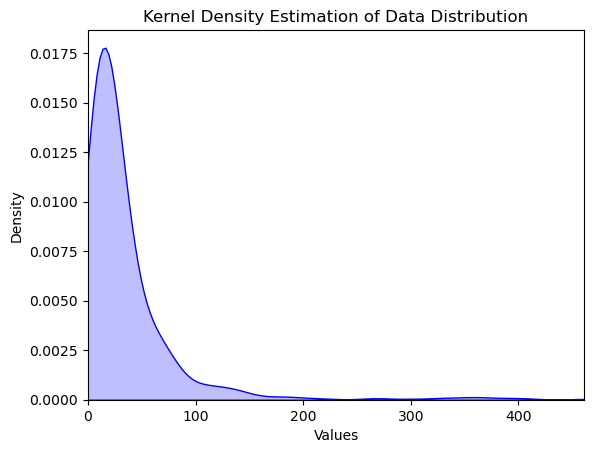

Multiple: 4.342857142857143
Left side ratio: 0.8128342245989305
Right side ratio: 0.18716577540106952
The data fall between 0.0 and 45.60000000000002


In [76]:
# View the distribution of label sets to set training weights.
sns.kdeplot(y_train_sj, color='blue', fill=True)
plt.xlabel('Values')
plt.ylabel('Density')
plt.title('Kernel Density Estimation of Data Distribution')
plt.xlim(0, max(y_train_sj))
plt.show()
data = np.array(y_train_sj)  
boundary=47
left_count = np.sum(data <= boundary)
right_count = np.sum(data > boundary)

left_ratio = left_count / len(data)
right_ratio = right_count / len(data)

print('Multiple:',left_ratio/right_ratio)
print("Left side ratio:", left_ratio)
print("Right side ratio:", right_ratio)

lower_bound = np.percentile(y_train_sj, 0)
upper_bound = np.percentile(y_train_sj, 80)

print(f"The data fall between {lower_bound} and {upper_bound}")

Selected feature names: Index(['reanalysis_air_temp_k', 'reanalysis_specific_humidity_g_per_kg',
       'station_avg_temp_c', 'station_diur_temp_rng_c', 'station_precip_mm',
       'reanalysis_air_temp_k_last10', 'reanalysis_avg_temp_k_last5',
       'reanalysis_max_air_temp_k_last10',
       'reanalysis_precip_amt_kg_per_m2_last5',
       'reanalysis_precip_amt_kg_per_m2_last10',
       'reanalysis_relative_humidity_percent_last10',
       'reanalysis_sat_precip_amt_mm_last5',
       'reanalysis_sat_precip_amt_mm_last10',
       'reanalysis_specific_humidity_g_per_kg_last5',
       'reanalysis_specific_humidity_g_per_kg_last10',
       'station_diur_temp_rng_c_last10', 'station_max_temp_c_last5',
       'station_max_temp_c_last10', 'station_min_temp_c_last10',
       'station_precip_mm_last5', 'station_precip_mm_last10', 'ndvi_n_last5',
       'ndvi_n_last10', 'ndvi_s_last10', 'weekofyear_1', 'weekofyear_2',
       'weekofyear_3', 'weekofyear_4', 'weekofyear_5', 'weekofyear_6',
      

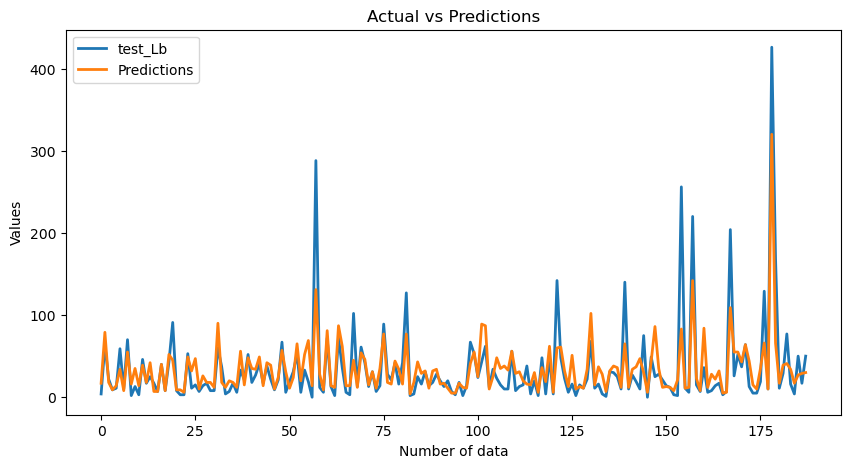

In [77]:
# RandomForest with city SJ

#=========================================================================
clf = RandomForestRegressor(n_estimators=200,random_state=42,max_leaf_nodes=None,max_depth=32,n_jobs=-1,max_features=32)
#=========================================================================
#  Use rfe.support_ to filter the selected feature names......
rfe = RFE(estimator=clf, n_features_to_select=24)  # 📒  特征筛选（递归特征消除 RFE）
boolean_features = X_train_sj.select_dtypes(include=['bool']).columns
non_boolean_features = X_train_sj.select_dtypes(exclude=['bool']).columns
rfe.fit(X_train_sj[non_boolean_features], y_train_sj)
feature_names = X_train_sj.columns
selected_non_boolean_feature_names = non_boolean_features[rfe.support_]

# Merge selected non-Boolean features with all Boolean features.....
selected_feature_names = X_train_sj.columns.intersection(selected_non_boolean_feature_names.union(boolean_features))
print("Selected feature names:", selected_feature_names)
X_train_sj=X_train_sj[selected_feature_names]
X_test_sj=X_test_sj[selected_feature_names]
target_sj_rf=target_sj_rf[selected_feature_names]
#=========================================================================
# Also perform feature screening on the data required for the dual-linear regression model.......
features_to_use = all_sj_dual.columns.difference(['weekofyear'])
rfe_2liner = RFE(estimator=clf, n_features_to_select=24)
rfe_2liner.fit(all_sj_dual[features_to_use].iloc[:len(data_sj)], label_sj_dual)
selected_feature_2liner_1 = features_to_use[rfe_2liner.support_]
print(selected_feature_2liner_1)
#=========================================================================
weights = np.where((y_train_sj > 46), 1, 4)
clf.fit(X_train_sj,y_train_sj,sample_weight=weights)

predictions = clf.predict(X_test_sj)
# predictions=predictions.astype(int)
predictions = np.round(predictions).astype(int)
print('============')
print(mean_absolute_error(y_test_sj, predictions))
print('============')
for i, pred in enumerate(predictions):
    print(pred ,":", y_test_sj[i])  
    if i > 20 :
        break


plt.figure(figsize=(10, 5))
plt.plot(y_test_sj, label='test_Lb', linewidth=2)
plt.plot(predictions, label='Predictions', linewidth=2)
plt.title('Actual vs Predictions')
plt.xlabel('Number of data')
plt.ylabel('Values')
plt.legend()
plt.show()

In [78]:
# Save model......
import pickle
with open("RandomForestRegressorCitySj.pickle", "wb") as f:
    pickle.dump(clf, f)
print(True)

True


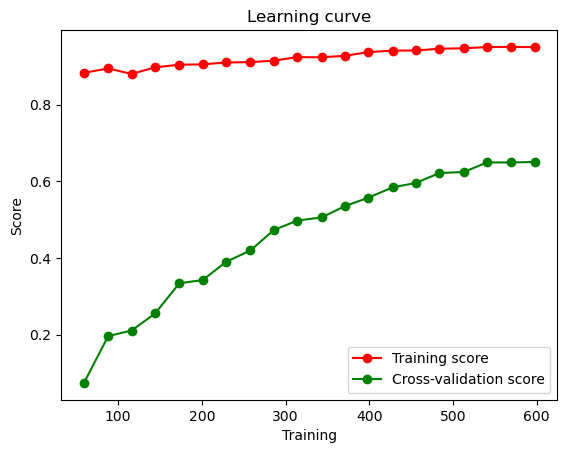

In [79]:
# Check learning_curve......
import warnings
warnings.filterwarnings('ignore')
train_sizes, train_scores, test_scores = learning_curve(clf, X_train_sj, y_train_sj, n_jobs=-1, cv=5, train_sizes=np.linspace(.1, 1.0, 20))
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.title('Learning curve')
plt.xlabel('Training')
plt.ylabel('Score')
plt.legend(loc="best")
plt.show()

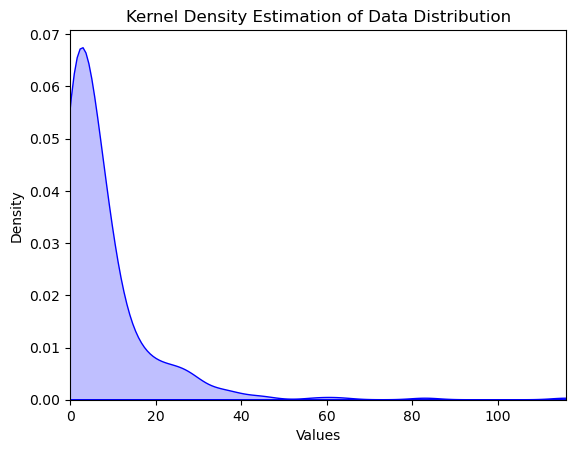

Multiple: 4.2
Left side ratio: 0.8076923076923077
Right side ratio: 0.19230769230769232
The data fall between 0.0 and 11.0


In [80]:
# Also view the label data distribution and define training weights.........

sns.kdeplot(y_train_iq, color='blue', fill=True)
plt.xlabel('Values')
plt.ylabel('Density')
plt.title('Kernel Density Estimation of Data Distribution')
plt.xlim(0, max(y_train_iq))
plt.show()

data = np.array(y_train_iq)
boundary=11
left_count = np.sum(data <= boundary)
right_count = np.sum(data > boundary)

left_ratio = left_count / len(data)
right_ratio = right_count / len(data)

print('Multiple:',left_ratio/right_ratio)
print("Left side ratio:", left_ratio)
print("Right side ratio:", right_ratio)
lower_bound = np.percentile(y_train_iq, 0)
upper_bound = np.percentile(y_train_iq, 80)

print(f"The data fall between {lower_bound} and {upper_bound}")

Selected feature names: Index(['reanalysis_max_air_temp_k', 'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_specific_humidity_g_per_kg', 'station_diur_temp_rng_c',
       'station_max_temp_c', 'ndvi_s', 'reanalysis_max_air_temp_k_last10',
       'reanalysis_min_air_temp_k_last5', 'reanalysis_min_air_temp_k_last10',
       'reanalysis_precip_amt_kg_per_m2_last5',
       'reanalysis_precip_amt_kg_per_m2_last10',
       'reanalysis_relative_humidity_percent_last10',
       'reanalysis_specific_humidity_g_per_kg_last5',
       'reanalysis_specific_humidity_g_per_kg_last10',
       'station_avg_temp_c_last5', 'station_avg_temp_c_last10',
       'station_diur_temp_rng_c_last5', 'station_diur_temp_rng_c_last10',
       'station_max_temp_c_last5', 'station_max_temp_c_last10',
       'station_min_temp_c_last5', 'station_precip_mm_last5',
       'station_precip_mm_last10', 'ndvi_n_last10', 'weekofyear_1',
       'weekofyear_2', 'weekofyear_3', 'weekofyear_4', 'weekofyear_5',
       'weekof

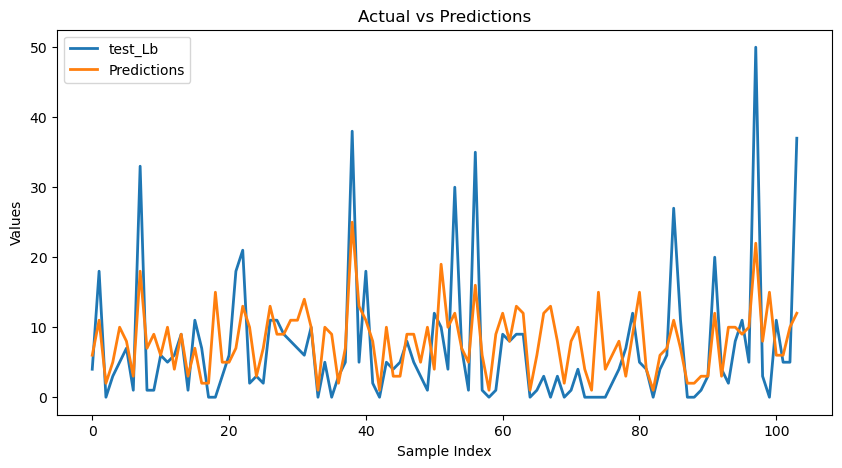

In [81]:
#RandomForest for city-iq........

#=========================================================================
clf = RandomForestRegressor(n_estimators=200,random_state=42,max_leaf_nodes=None,max_depth=32,n_jobs=-1,max_features=32)
#=========================================================================

rfe = RFE(estimator=clf, n_features_to_select=24)

boolean_features = X_train_iq.select_dtypes(include=['bool']).columns
non_boolean_features = X_train_iq.select_dtypes(exclude=['bool']).columns

rfe.fit(X_train_iq[non_boolean_features], y_train_iq)

feature_names = X_train_iq.columns
selected_non_boolean_feature_names = non_boolean_features[rfe.support_]
selected_feature_names = X_train_iq.columns.intersection(selected_non_boolean_feature_names.union(boolean_features))


print("Selected feature names:", selected_feature_names)
#=========================================================================
features_to_use = all_iq_dual.columns.difference(['weekofyear'])
rfe_2liner = RFE(estimator=clf, n_features_to_select=24)
rfe_2liner.fit(all_iq_dual[features_to_use].iloc[:len(data_iq)], label_iq_dual)
selected_feature_2liner_0 = features_to_use[rfe_2liner.support_]
print(selected_feature_2liner_0)
#=========================================================================

X_train_iq=X_train_iq[selected_feature_names]
X_test_iq=X_test_iq[selected_feature_names]
target_iq_rf=target_iq_rf[selected_feature_names]

#=========================================================================
weights = np.where((y_train_iq > 11), 1, 2)
# Weight training seems to perform poorly on this city's data.......
clf.fit(X_train_iq,y_train_iq
        # ,sample_weight=weights
       )
predictions = clf.predict(X_test_iq)
predictions = np.round(predictions).astype(int)

print('============')
print(mean_absolute_error(y_test_iq, predictions))
print('============')

for i, pred in enumerate(predictions):
    print(pred ,":", y_test_iq[i]) 
    if i > 20 :
        break


plt.figure(figsize=(10, 5))
plt.plot(y_test_iq, label='test_Lb', linewidth=2)
plt.plot(predictions, label='Predictions', linewidth=2)
plt.title('Actual vs Predictions')
plt.xlabel('Sample Index')
plt.ylabel('Values')
plt.legend()
plt.show()

In [82]:
# Save, read, and use models.......
with open("RandomForestRegressorCityIq.pickle", "wb") as f:
    pickle.dump(clf, f)

with open("RandomForestRegressorCitySj.pickle", "rb") as f:
    RandomForestRegressorCitySj = pickle.load(f)
with open("RandomForestRegressorCityIq.pickle", "rb") as f:
    RandomForestRegressorCityIq = pickle.load(f)

17 : 4
79 : 64
18 : 22
9 : 9
14 : 11
34 : 59
8 : 10
55 : 70
16 : 2
35 : 13
14 : 3
39 : 46
12.496575342465754


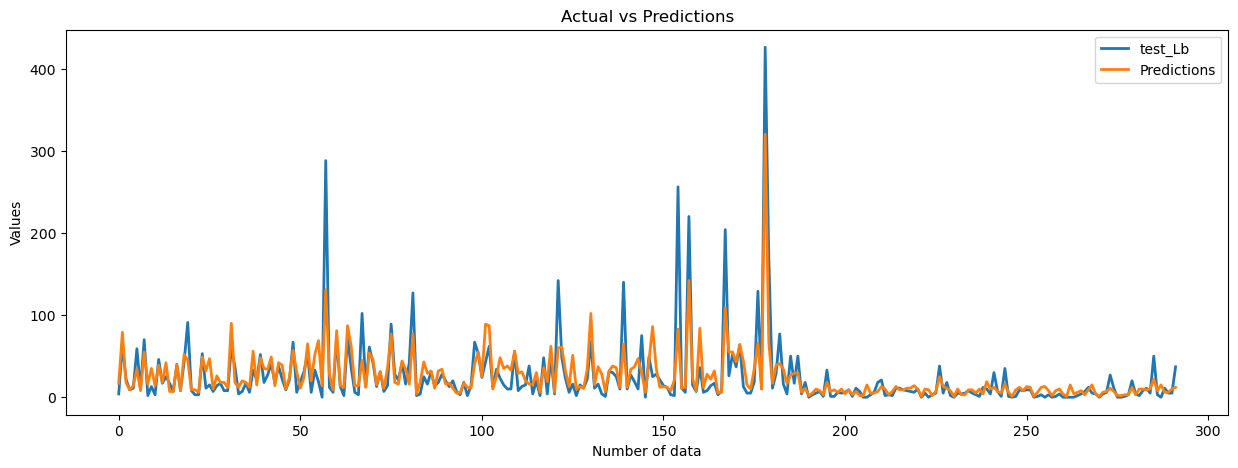

In [83]:
# overall prediction results........
predictionsSj = RandomForestRegressorCitySj.predict(X_test_sj)
predictionsIq = RandomForestRegressorCityIq.predict(X_test_iq)

predictionsSj = pd.Series(predictionsSj)
predictionsIq = pd.Series(predictionsIq)

predictions = pd.concat([predictionsSj, predictionsIq])
predictions.reset_index(drop=True, inplace=True)
predictions = np.round(predictions).astype(int)

y_test_sj = pd.Series(y_test_sj)
y_test_iq = pd.Series(y_test_iq)
test_Lb=pd.concat([y_test_sj, y_test_iq], ignore_index=True)
test_Lb.reset_index(drop=True, inplace=True)

for i, pred in enumerate(predictions):
    print(pred ,":", test_Lb.iloc[i])  
    if i > 10 :
        break

print('============')
print(mean_absolute_error(test_Lb, predictions))
print('============')

plt.figure(figsize=(15, 5))
plt.plot(test_Lb, label='test_Lb', linewidth=2)
plt.plot(predictions, label='Predictions', linewidth=2)
plt.title('Actual vs Predictions')
plt.xlabel('Number of data')
plt.ylabel('Values')
plt.legend()
plt.show()

In [84]:
# Data predicted using Random Forest is put into Submission_RandomForest.csv file.......
predictionsSj = RandomForestRegressorCitySj.predict(target_sj_rf)
predictionsIq = RandomForestRegressorCityIq.predict(target_iq_rf)
predictionsSj = pd.Series(predictionsSj)
predictionsIq = pd.Series(predictionsIq)
print(len(predictionsSj))

predictions = pd.concat([predictionsSj, predictionsIq])
predictions.reset_index(drop=True, inplace=True)
predictions = np.round(predictions).astype(int)
print(predictions)

submission=pd.read_csv('Submission.csv', index_col=False)
submission['total_cases']= predictions
# submission['total_cases'] = submission['total_cases'].astype(int)
submission.to_csv('Submission_RandomForest.csv',index=False)
submission.info()

260
0      5
1      4
2      7
3      6
4      7
      ..
411    4
412    5
413    4
414    5
415    3
Length: 416, dtype: int32
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 416 entries, 0 to 415
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   city         416 non-null    object
 1   year         416 non-null    int64 
 2   weekofyear   416 non-null    int64 
 3   total_cases  416 non-null    int32 
dtypes: int32(1), int64(2), object(1)
memory usage: 11.5+ KB


### Dual Linear Regression

In [85]:
# Check whether the data information required by the dual-liner regression model is correct.......
print(len(all_sj_dual))
print(len(all_iq_dual))
print('---')
print(len(data_sj))
print(len(label_sj_dual))
print('---')
print(len(data_iq))
print(len(label_iq_dual))

print('city_sj:',selected_feature_2liner_1)
print('city_iq',selected_feature_2liner_0)

1196
676
---
936
936
---
520
520
city_sj: Index(['ndvi_n_last10', 'ndvi_n_last5', 'ndvi_s_last10', 'ndvi_s_last5',
       'reanalysis_air_temp_k_last10', 'reanalysis_avg_temp_k_last5',
       'reanalysis_max_air_temp_k_last10', 'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_precip_amt_kg_per_m2_last10',
       'reanalysis_precip_amt_kg_per_m2_last5',
       'reanalysis_relative_humidity_percent_last10',
       'reanalysis_relative_humidity_percent_last5',
       'reanalysis_sat_precip_amt_mm_last10',
       'reanalysis_sat_precip_amt_mm_last5',
       'reanalysis_specific_humidity_g_per_kg',
       'reanalysis_specific_humidity_g_per_kg_last10',
       'reanalysis_specific_humidity_g_per_kg_last5', 'station_avg_temp_c',
       'station_diur_temp_rng_c', 'station_diur_temp_rng_c_last10',
       'station_max_temp_c_last10', 'station_max_temp_c_last5',
       'station_min_temp_c_last10', 'station_precip_mm_last10'],
      dtype='object')
city_iq Index(['ndvi_n_last10', 'ndvi_s_last

In [86]:
def Dual_linear_regression(city,label,data_len,smooth_control,features,lower):
    weeks_for_1_year = 53
    # The first step of forecasting needs to be very sensitive to seasonal trends
    dummy_weeks = pd.get_dummies(city['weekofyear'], prefix='week')
    clf = LinearRegression()
    train_set = dummy_weeks[:data_len].reset_index(drop=True)
    target_set = dummy_weeks[data_len:].reset_index(drop=True)

    # First let the model fit the time series data.....
    clf.fit(train_set, label)
    # The remodel predicts the original data and smoothes the results so that the results have seasonal trends.....
    # Different cities have different feedback on how seasonal forecasts are smoothed-'smooth_control'
    predict_seasonal = pd.Series(clf.predict(train_set).flatten()).rolling(smooth_control, min_periods=1, center=True).mean()
    
    # Get the difference between seasonal and actual values
    Difference = label - predict_seasonal
    train_Difference = Difference[weeks_for_1_year:]

    # Obtain the features that mainly affect the data, partially trained from the random forest model......
    Smoothing = city[features].reset_index(drop=True).rolling(weeks_for_1_year, min_periods=1).mean()
    train_Smoothing = Smoothing[weeks_for_1_year:data_len]
    target_Smoothing = Smoothing[data_len:]

    # The second step mainly predicts the residual value of the seasonal forecast......
    clf_Smoothing = LinearRegression()
    clf_Smoothing.fit(train_Smoothing, train_Difference)
    train_pred_Smoothing = pd.Series(clf_Smoothing.predict(train_Smoothing).flatten())
    
    city_mae =  (mean_absolute_error(y_pred=train_pred_Smoothing.values +
                                predict_seasonal[weeks_for_1_year:].values,
                                y_true=label[weeks_for_1_year:]))
    print(str(city_mae))

    # Predict the target test set through the trained model......
    pred_predict_seasonal = pd.Series(clf.predict(target_set).flatten())
    pred_Smoothing = pd.Series(clf_Smoothing.predict(target_Smoothing).flatten())
    # Control the smoothness of result to achieve the best score
    pred_result = (pred_Smoothing + pred_predict_seasonal).rolling(20, min_periods=1, center=True).mean()
    # print(pred_result)
    pred_result = pred_result.round().clip(lower=lower).astype(int)
    return pred_result , city_mae

pred_result1 = Dual_linear_regression(all_sj_dual,label_sj_dual,len(data_sj),52,selected_feature_2liner_1,5)
pred_result0 = Dual_linear_regression(all_iq_dual,label_iq_dual,len(data_iq),2,selected_feature_2liner_0,1)

# In this model, for smoothing control, the minimum value, the result smoothness, 
# and the number of feature selections are all hyperparameters........

predictions = pd.concat([pred_result1[0], pred_result0[0]])
predictions.reset_index(drop=True, inplace=True)

# Average prediction results are not excellent for local testing
mae = pred_result1[1] * 260/416 + pred_result0[1] * 156/416

print('real_mae:--',str(mae))
submission=pd.read_csv('Submission.csv', index_col=False)
submission['total_cases']= predictions
submission.to_csv('Submission_dual_liner.csv',index=False)

# Through continuous testing, the best web test score was obtained:      18.3269

26.214126487609214
5.506920786300025
real_mae:-- 18.448924349618267
